In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing

# Univariate Outlier detection

In [2]:
df = pd.read_csv('prog_book.csv')

In [3]:
df.info(), df.describe(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271 entries, 0 to 270
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rating           271 non-null    float64
 1   Reviews          271 non-null    object 
 2   Book_title       271 non-null    object 
 3   Description      271 non-null    object 
 4   Number_Of_Pages  271 non-null    int64  
 5   Type             271 non-null    object 
 6   Price            271 non-null    float64
dtypes: float64(2), int64(1), object(4)
memory usage: 14.9+ KB


(None,
            Rating  Number_Of_Pages       Price
 count  271.000000       271.000000  271.000000
 mean     4.067417       475.077491   54.541860
 std      0.290749       306.147492   35.711485
 min      3.000000        50.000000    9.323529
 25%      3.915000       289.000000   30.751471
 50%      4.100000       384.000000   46.317647
 75%      4.250000       572.500000   67.854412
 max      5.000000      3168.000000  235.650000,
    Rating Reviews                                         Book_title  \
 0    4.17   3,829                              The Elements of Style   
 1    4.01   1,406      The Information: A History, a Theory, a Flood   
 2    3.33       0       Responsive Web Design Overview For Beginners   
 3    3.97   1,658  Ghost in the Wires: My Adventures as the World...   
 4    4.06   1,325                                   How Google Works   
 
                                          Description  Number_Of_Pages  \
 0  This style manual offers practical advice 

<Axes: >

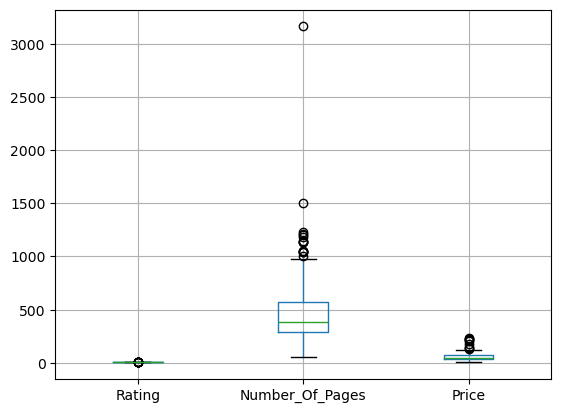

In [4]:
df.boxplot()

In [5]:
pages_outlier_indices = np.where(df["Number_Of_Pages"] > df["Number_Of_Pages"].quantile(0.75) + 1.5 * (df["Number_Of_Pages"].quantile(0.75) - df["Number_Of_Pages"].quantile(0.25)))[0]

price_outlier_indices = np.where(df["Price"] > df["Price"].quantile(0.75) + 1.5 * (df["Price"].quantile(0.75) - df["Price"].quantile(0.25)))[0]

In [6]:
print(df.iloc[price_outlier_indices]["Price"]) # price outliers

262    126.579412
263    139.435294
264    143.138235
265    176.144118
266    203.108823
267    212.097059
268    220.385294
269    220.385294
270    235.650000
Name: Price, dtype: float64


In [7]:
print(df.iloc[pages_outlier_indices]["Number_Of_Pages"]) # pages outliers

86     1200
129    1008
137    1506
203    1214
206    1040
232    1142
240    1180
245    1052
249    1056
253    1136
258    1136
259    1132
260    1040
265    1235
267    1040
269    3168
Name: Number_Of_Pages, dtype: int64


# Multivariate Outlier detection

In [8]:
columns_of_interest = ["Price", "Number_Of_Pages", "Rating", "Reviews", "Type"]

In [9]:
if type(df["Reviews"].values[0]) == str:
    df["Reviews"] = df["Reviews"].apply(lambda x : int(x.replace(",", "")))
if type(df["Type"].values[0] != int):
    df["Type"] = df["Type"].replace({'Hardcover' : 1, 'Kindle Edition' : 2, 'Paperback' : 3, 'ebook' : 4,
       'Unknown Binding' : 5, 'Boxed Set - Hardcover' : 6})
    
df[columns_of_interest] = pd.DataFrame(preprocessing.StandardScaler().fit(np.array(df[columns_of_interest])).transform(np.array(df[columns_of_interest])))

/var/folders/k3/z0xkry117tv9_jws4xpf88m80000gn/T/ipykernel_53433/4289706759.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Type"] = df["Type"].replace({'Hardcover' : 1, 'Kindle Edition' : 2, 'Paperback' : 3, 'ebook' : 4,


In [10]:
def plot_DBSCAN(dbscan_fit, original_data):
    labels = dbscan_fit.labels_
    # print(labels)
    unique_labels = set(labels)
    core_samples_mask = np.zeros_like(labels, dtype=bool)
    core_samples_mask[dbscan_fit.core_sample_indices_] = True

    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]
        class_member_mask = labels == k
        xy = original_data[class_member_mask & core_samples_mask]
        plt.plot(
            xy[:, 0],
            xy[:, 1],
            "o",
            markerfacecolor=tuple(col),
            markeredgecolor="k",
            markersize=14,
        )

        xy = original_data[class_member_mask & ~core_samples_mask]
        plt.plot(
            xy[:, 0],
            xy[:, 1],
            "o",
            markerfacecolor=tuple(col),
            markeredgecolor="k",
            markersize=6,
        )
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    plt.title(f"Estimated number of clusters: {n_clusters_}")
    plt.show()

~~~~~~~~~~~~~~ PLOTTING FOR COLUMNS 'Price' AND 'Number_Of_Pages' ~~~~~~~~~~~~~~~~~~~~~


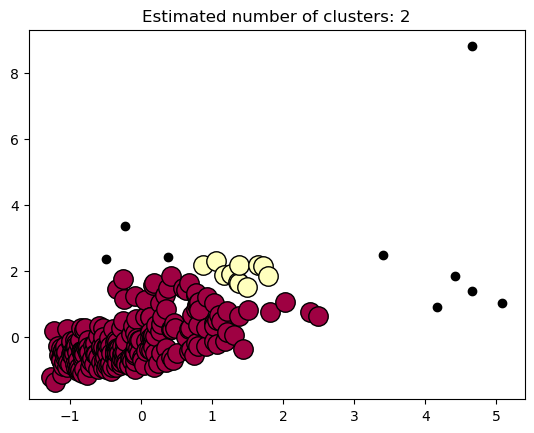

~~~~~~~~~~~~~~ CORRESPONDING OUTLIERS ~~~~~~~~~~~~~~
NUMBER OF OUTLIERS :  9
                                            Book_title     Price  \
86                                    Beginning Java 2 -0.502846   
137  The Linux Programming Interface: A Linux and U... -0.229567   
203                                    Learning Python  0.374007   
265  Numerical Recipes: The Art of Scientific Compu...  3.411430   
266  3D Game Engine Architecture: Engineering Real-...  4.167898   
267                An Introduction to Database Systems  4.420054   
268  The Art of Computer Programming, Volumes 1-3 B...  4.652572   
269  The Art of Computer Programming, Volumes 1-4a ...  4.652572   
270              A Discipline for Software Engineering  5.080809   

     Number_Of_Pages  
86          2.372267  
137         3.373635  
203         2.418082  
265         2.486803  
266         0.906213  
267         1.848677  
268         1.377445  
269         8.812435  
270         1.027293  
~~~~~~~~~~~~

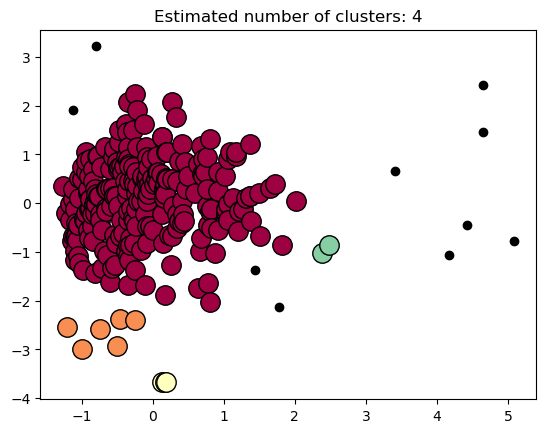

~~~~~~~~~~~~~~ CORRESPONDING OUTLIERS ~~~~~~~~~~~~~~
NUMBER OF OUTLIERS :  10
                                            Book_title     Price    Rating
9    ZX Spectrum Games Code Club: Twenty fun games ... -1.119374  1.904069
54                             Your First App: Node.js -0.804757  3.213457
255                                 Game Engine Gems 1  1.433788 -1.369404
260  3D Game Engine Design: A Practical Approach to...  1.779925 -2.127471
265  Numerical Recipes: The Art of Scientific Compu...  3.411430  0.663595
266  3D Game Engine Architecture: Engineering Real-...  4.167898 -1.059285
267                An Introduction to Database Systems  4.420054 -0.439048
268  The Art of Computer Programming, Volumes 1-3 B...  4.652572  1.456120
269  The Art of Computer Programming, Volumes 1-4a ...  4.652572  2.420933
270              A Discipline for Software Engineering  5.080809 -0.783624
~~~~~~~~~~~~~~ PLOTTING FOR COLUMNS 'Price' AND 'Reviews' ~~~~~~~~~~~~~~~~~~~~~


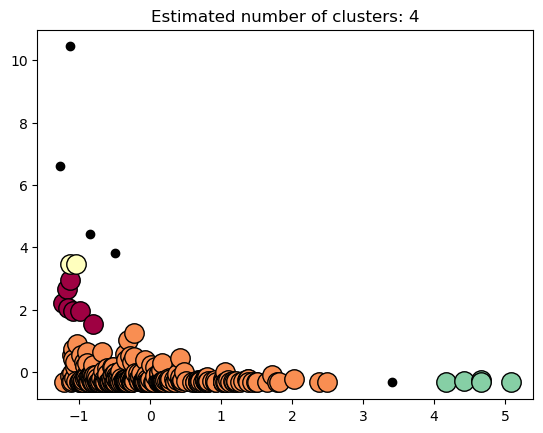

~~~~~~~~~~~~~~ CORRESPONDING OUTLIERS ~~~~~~~~~~~~~~
NUMBER OF OUTLIERS :  5
                                            Book_title     Price    Reviews
0                                The Elements of Style -1.268555   6.611187
6    Start with Why: How Great Leaders Inspire Ever... -1.130843  10.438061
45   The Phoenix Project: A Novel About IT, DevOps,... -0.849560   4.433735
90          The Goal: A Process of Ongoing Improvement -0.488159   3.818604
265  Numerical Recipes: The Art of Scientific Compu...  3.411430  -0.327629
~~~~~~~~~~~~~~ PLOTTING FOR COLUMNS 'Price' AND 'Type' ~~~~~~~~~~~~~~~~~~~~~


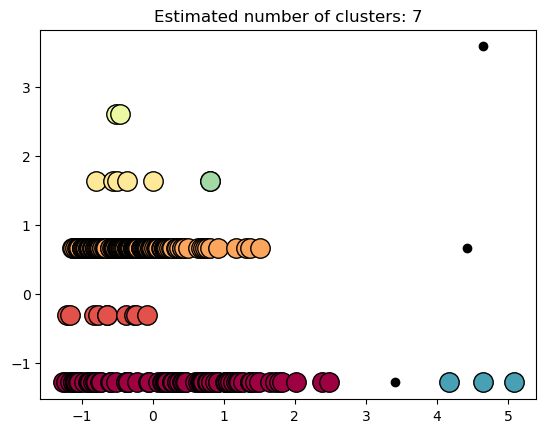

~~~~~~~~~~~~~~ CORRESPONDING OUTLIERS ~~~~~~~~~~~~~~
NUMBER OF OUTLIERS :  3
                                            Book_title     Price      Type
265  Numerical Recipes: The Art of Scientific Compu...  3.411430 -1.277982
267                An Introduction to Database Systems  4.420054  0.667710
268  The Art of Computer Programming, Volumes 1-3 B...  4.652572  3.586247
~~~~~~~~~~~~~~ PLOTTING FOR COLUMNS 'Number_Of_Pages' AND 'Price' ~~~~~~~~~~~~~~~~~~~~~


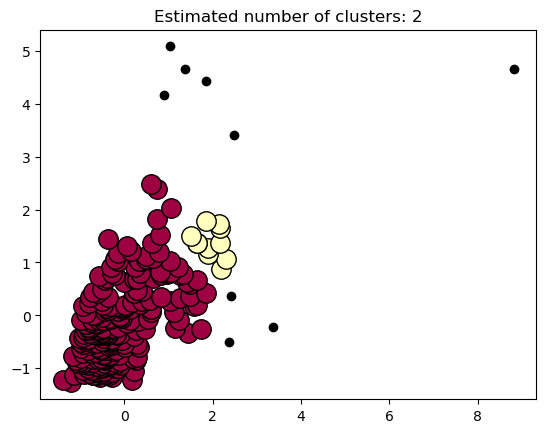

~~~~~~~~~~~~~~ CORRESPONDING OUTLIERS ~~~~~~~~~~~~~~
NUMBER OF OUTLIERS :  9
                                            Book_title  Number_Of_Pages  \
86                                    Beginning Java 2         2.372267   
137  The Linux Programming Interface: A Linux and U...         3.373635   
203                                    Learning Python         2.418082   
265  Numerical Recipes: The Art of Scientific Compu...         2.486803   
266  3D Game Engine Architecture: Engineering Real-...         0.906213   
267                An Introduction to Database Systems         1.848677   
268  The Art of Computer Programming, Volumes 1-3 B...         1.377445   
269  The Art of Computer Programming, Volumes 1-4a ...         8.812435   
270              A Discipline for Software Engineering         1.027293   

        Price  
86  -0.502846  
137 -0.229567  
203  0.374007  
265  3.411430  
266  4.167898  
267  4.420054  
268  4.652572  
269  4.652572  
270  5.080809  
~~~~~~~~~~~~

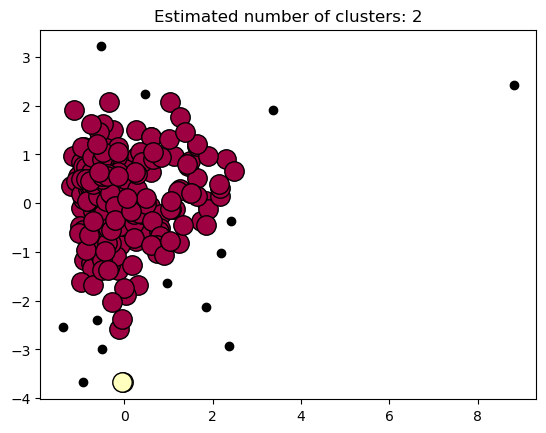

~~~~~~~~~~~~~~ CORRESPONDING OUTLIERS ~~~~~~~~~~~~~~
NUMBER OF OUTLIERS :  13
                                            Book_title  Number_Of_Pages  \
2         Responsive Web Design Overview For Beginners        -1.391042   
24                       Game Programming Golden Rules        -0.514027   
54                             Your First App: Node.js        -0.517300   
86                                    Beginning Java 2         2.372267   
131  Designing Data-Intensive Applications: The Big...         0.461161   
132                     Unity Virtual Reality Projects        -0.618745   
137  The Linux Programming Interface: A Linux and U...         3.373635   
187  Lambda-Calculus, Combinators and Functional Pr...        -0.926355   
203                                    Learning Python         2.418082   
226  Genetic Programming II: Automatic Discovery of...         0.958572   
232                           Database System Concepts         2.182466   
260  3D Game Engine De

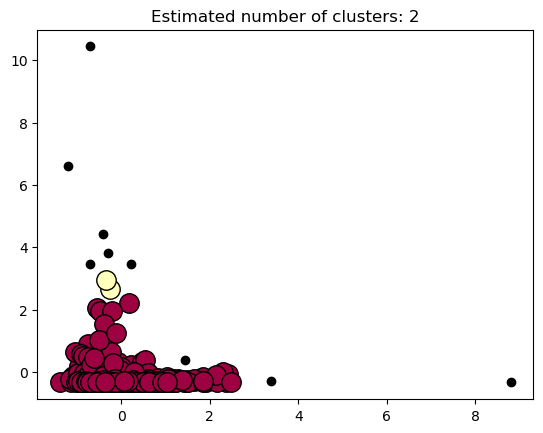

~~~~~~~~~~~~~~ CORRESPONDING OUTLIERS ~~~~~~~~~~~~~~
NUMBER OF OUTLIERS :  9
                                            Book_title  Number_Of_Pages  \
0                                The Elements of Style        -1.211057   
6    Start with Why: How Great Leaders Inspire Ever...        -0.716919   
8    Weapons of Math Destruction: How Big Data Incr...        -0.707101   
19   The Innovators: How a Group of Hackers, Genius...         0.219000   
45   The Phoenix Project: A Novel About IT, DevOps,...        -0.425671   
90          The Goal: A Process of Ongoing Improvement        -0.298046   
119                                      Code Complete         1.436349   
137  The Linux Programming Interface: A Linux and U...         3.373635   
269  The Art of Computer Programming, Volumes 1-4a ...         8.812435   

       Reviews  
0     6.611187  
6    10.438061  
8     3.461139  
19    3.459324  
45    4.433735  
90    3.818604  
119   0.380043  
137  -0.285894  
269  -0.329444  
~~

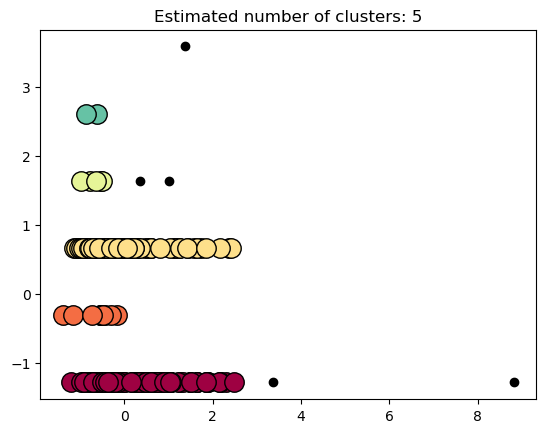

~~~~~~~~~~~~~~ CORRESPONDING OUTLIERS ~~~~~~~~~~~~~~
NUMBER OF OUTLIERS :  5
                                            Book_title  Number_Of_Pages  \
137  The Linux Programming Interface: A Linux and U...         3.373635   
228                                      Deep Learning         1.020749   
229    Practical Foundations for Programming Languages         0.349898   
268  The Art of Computer Programming, Volumes 1-3 B...         1.377445   
269  The Art of Computer Programming, Volumes 1-4a ...         8.812435   

         Type  
137 -1.277982  
228  1.640556  
229  1.640556  
268  3.586247  
269 -1.277982  
~~~~~~~~~~~~~~ PLOTTING FOR COLUMNS 'Rating' AND 'Price' ~~~~~~~~~~~~~~~~~~~~~


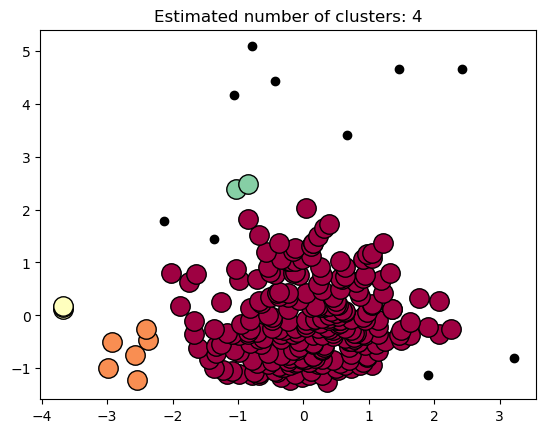

~~~~~~~~~~~~~~ CORRESPONDING OUTLIERS ~~~~~~~~~~~~~~
NUMBER OF OUTLIERS :  10
                                            Book_title    Rating     Price
9    ZX Spectrum Games Code Club: Twenty fun games ...  1.904069 -1.119374
54                             Your First App: Node.js  3.213457 -0.804757
255                                 Game Engine Gems 1 -1.369404  1.433788
260  3D Game Engine Design: A Practical Approach to... -2.127471  1.779925
265  Numerical Recipes: The Art of Scientific Compu...  0.663595  3.411430
266  3D Game Engine Architecture: Engineering Real-... -1.059285  4.167898
267                An Introduction to Database Systems -0.439048  4.420054
268  The Art of Computer Programming, Volumes 1-3 B...  1.456120  4.652572
269  The Art of Computer Programming, Volumes 1-4a ...  2.420933  4.652572
270              A Discipline for Software Engineering -0.783624  5.080809
~~~~~~~~~~~~~~ PLOTTING FOR COLUMNS 'Rating' AND 'Number_Of_Pages' ~~~~~~~~~~~~~~~~~~~~~


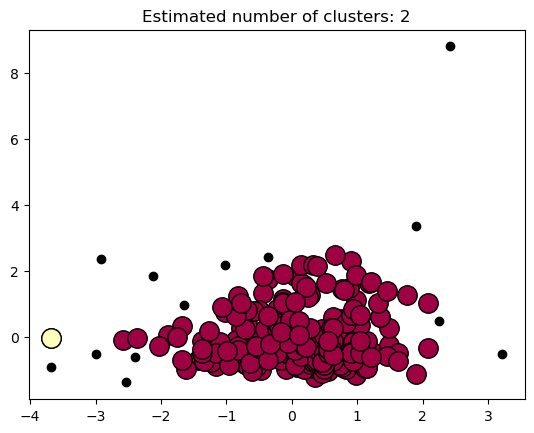

~~~~~~~~~~~~~~ CORRESPONDING OUTLIERS ~~~~~~~~~~~~~~
NUMBER OF OUTLIERS :  13
                                            Book_title    Rating  \
2         Responsive Web Design Overview For Beginners -2.540962   
24                       Game Programming Golden Rules -2.988911   
54                             Your First App: Node.js  3.213457   
86                                    Beginning Java 2 -2.919996   
131  Designing Data-Intensive Applications: The Big...  2.248645   
132                     Unity Virtual Reality Projects -2.403132   
137  The Linux Programming Interface: A Linux and U...  1.904069   
187  Lambda-Calculus, Combinators and Functional Pr... -3.678063   
203                                    Learning Python -0.370133   
226  Genetic Programming II: Automatic Discovery of... -1.645064   
232                           Database System Concepts -1.024828   
260  3D Game Engine Design: A Practical Approach to... -2.127471   
269  The Art of Computer Programming, 

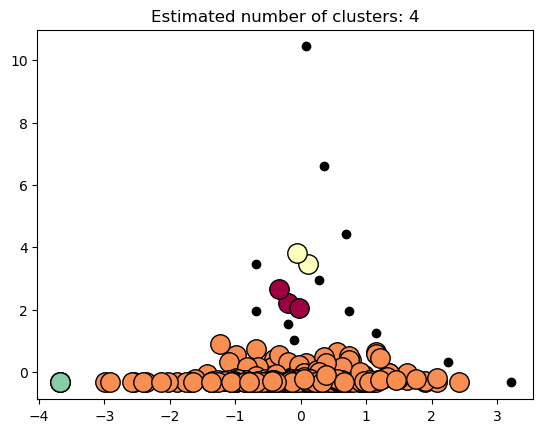

~~~~~~~~~~~~~~ CORRESPONDING OUTLIERS ~~~~~~~~~~~~~~
NUMBER OF OUTLIERS :  12
                                            Book_title    Rating    Reviews
0                                The Elements of Style  0.353476   6.611187
6    Start with Why: How Great Leaders Inspire Ever...  0.077816  10.438061
7    Algorithms to Live By: The Computer Science of...  0.284561   2.960325
8    Weapons of Math Destruction: How Big Data Incr... -0.680252   3.461139
13       Superintelligence: Paths, Dangers, Strategies -0.680252   1.940551
23   The Code Book: The Science of Secrecy from Anc...  0.732510   1.964140
45   The Phoenix Project: A Novel About IT, DevOps,...  0.698053   4.433735
52                         Chaos: Making a New Science -0.197845   1.541351
54                             Your First App: Node.js  3.213457  -0.336702
122  The Mythical Man-Month: Essays on Software Eng... -0.094472   1.016948
131  Designing Data-Intensive Applications: The Big...  2.248645   0.320163
138  Clean

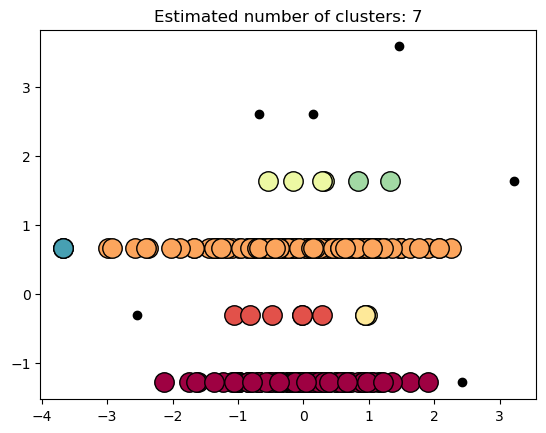

~~~~~~~~~~~~~~ CORRESPONDING OUTLIERS ~~~~~~~~~~~~~~
NUMBER OF OUTLIERS :  6
                                            Book_title    Rating      Type
2         Responsive Web Design Overview For Beginners -2.540962 -0.305136
54                             Your First App: Node.js  3.213457  1.640556
85   How to Think Like a Computer Scientist: Learni...  0.146731  2.613401
95                           Learn Python The Hard Way -0.680252  2.613401
268  The Art of Computer Programming, Volumes 1-3 B...  1.456120  3.586247
269  The Art of Computer Programming, Volumes 1-4a ...  2.420933 -1.277982
~~~~~~~~~~~~~~ PLOTTING FOR COLUMNS 'Reviews' AND 'Price' ~~~~~~~~~~~~~~~~~~~~~


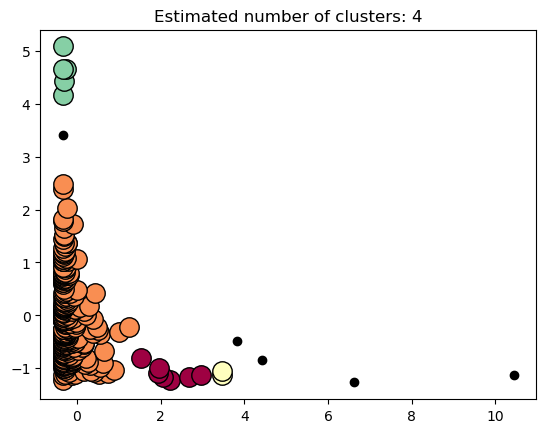

~~~~~~~~~~~~~~ CORRESPONDING OUTLIERS ~~~~~~~~~~~~~~
NUMBER OF OUTLIERS :  5
                                            Book_title    Reviews     Price
0                                The Elements of Style   6.611187 -1.268555
6    Start with Why: How Great Leaders Inspire Ever...  10.438061 -1.130843
45   The Phoenix Project: A Novel About IT, DevOps,...   4.433735 -0.849560
90          The Goal: A Process of Ongoing Improvement   3.818604 -0.488159
265  Numerical Recipes: The Art of Scientific Compu...  -0.327629  3.411430
~~~~~~~~~~~~~~ PLOTTING FOR COLUMNS 'Reviews' AND 'Number_Of_Pages' ~~~~~~~~~~~~~~~~~~~~~


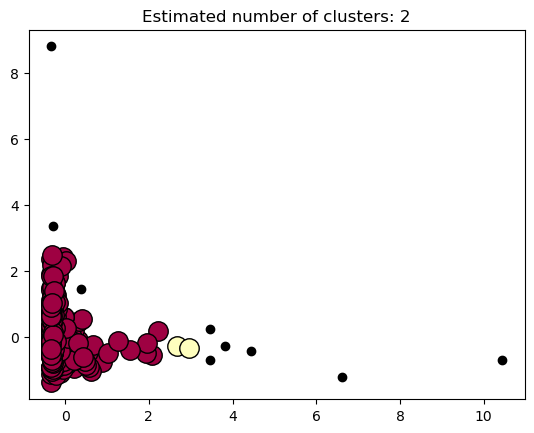

~~~~~~~~~~~~~~ CORRESPONDING OUTLIERS ~~~~~~~~~~~~~~
NUMBER OF OUTLIERS :  9
                                            Book_title    Reviews  \
0                                The Elements of Style   6.611187   
6    Start with Why: How Great Leaders Inspire Ever...  10.438061   
8    Weapons of Math Destruction: How Big Data Incr...   3.461139   
19   The Innovators: How a Group of Hackers, Genius...   3.459324   
45   The Phoenix Project: A Novel About IT, DevOps,...   4.433735   
90          The Goal: A Process of Ongoing Improvement   3.818604   
119                                      Code Complete   0.380043   
137  The Linux Programming Interface: A Linux and U...  -0.285894   
269  The Art of Computer Programming, Volumes 1-4a ...  -0.329444   

     Number_Of_Pages  
0          -1.211057  
6          -0.716919  
8          -0.707101  
19          0.219000  
45         -0.425671  
90         -0.298046  
119         1.436349  
137         3.373635  
269         8.812435  
~~

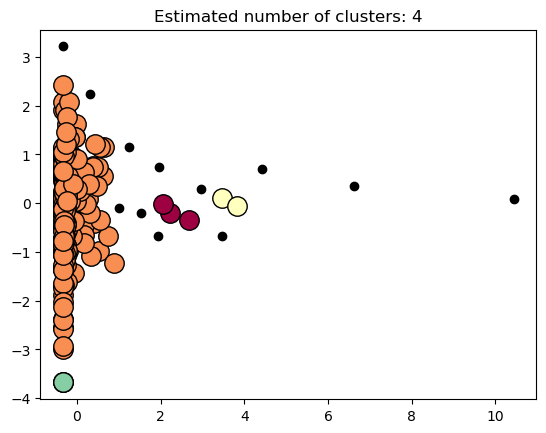

~~~~~~~~~~~~~~ CORRESPONDING OUTLIERS ~~~~~~~~~~~~~~
NUMBER OF OUTLIERS :  12
                                            Book_title    Reviews    Rating
0                                The Elements of Style   6.611187  0.353476
6    Start with Why: How Great Leaders Inspire Ever...  10.438061  0.077816
7    Algorithms to Live By: The Computer Science of...   2.960325  0.284561
8    Weapons of Math Destruction: How Big Data Incr...   3.461139 -0.680252
13       Superintelligence: Paths, Dangers, Strategies   1.940551 -0.680252
23   The Code Book: The Science of Secrecy from Anc...   1.964140  0.732510
45   The Phoenix Project: A Novel About IT, DevOps,...   4.433735  0.698053
52                         Chaos: Making a New Science   1.541351 -0.197845
54                             Your First App: Node.js  -0.336702  3.213457
122  The Mythical Man-Month: Essays on Software Eng...   1.016948 -0.094472
131  Designing Data-Intensive Applications: The Big...   0.320163  2.248645
138  Clean

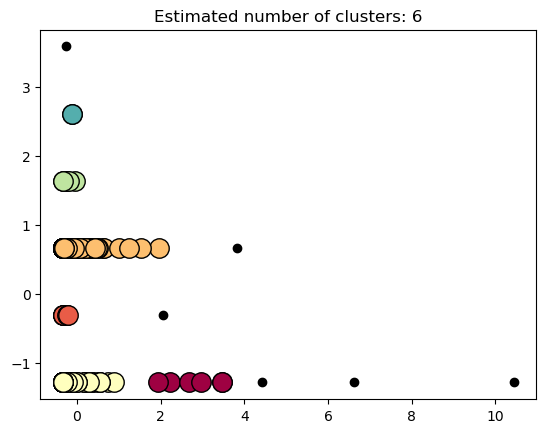

~~~~~~~~~~~~~~ CORRESPONDING OUTLIERS ~~~~~~~~~~~~~~
NUMBER OF OUTLIERS :  6
                                            Book_title    Reviews      Type
0                                The Elements of Style   6.611187 -1.277982
4                                     How Google Works   2.067569 -0.305136
6    Start with Why: How Great Leaders Inspire Ever...  10.438061 -1.277982
45   The Phoenix Project: A Novel About IT, DevOps,...   4.433735 -1.277982
90          The Goal: A Process of Ongoing Improvement   3.818604  0.667710
268  The Art of Computer Programming, Volumes 1-3 B...  -0.271378  3.586247
~~~~~~~~~~~~~~ PLOTTING FOR COLUMNS 'Type' AND 'Price' ~~~~~~~~~~~~~~~~~~~~~


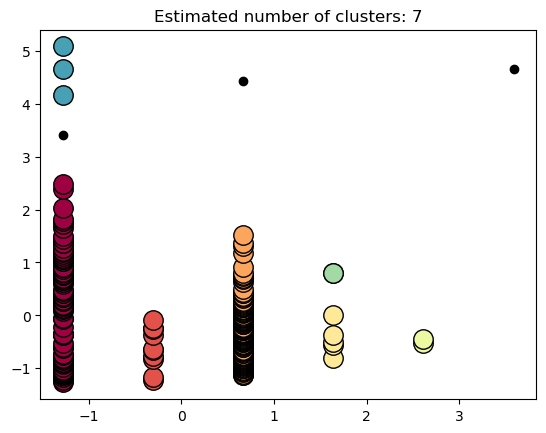

~~~~~~~~~~~~~~ CORRESPONDING OUTLIERS ~~~~~~~~~~~~~~
NUMBER OF OUTLIERS :  3
                                            Book_title      Type     Price
265  Numerical Recipes: The Art of Scientific Compu... -1.277982  3.411430
267                An Introduction to Database Systems  0.667710  4.420054
268  The Art of Computer Programming, Volumes 1-3 B...  3.586247  4.652572
~~~~~~~~~~~~~~ PLOTTING FOR COLUMNS 'Type' AND 'Number_Of_Pages' ~~~~~~~~~~~~~~~~~~~~~


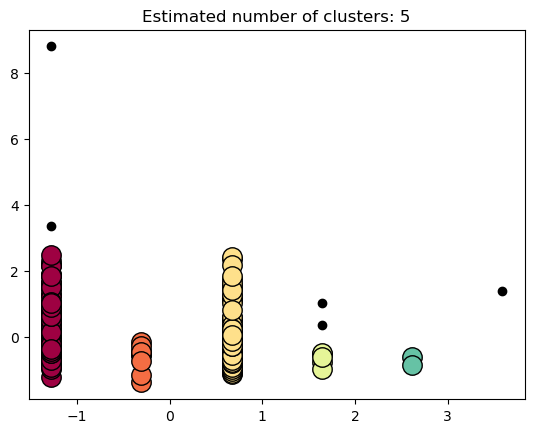

~~~~~~~~~~~~~~ CORRESPONDING OUTLIERS ~~~~~~~~~~~~~~
NUMBER OF OUTLIERS :  5
                                            Book_title      Type  \
137  The Linux Programming Interface: A Linux and U... -1.277982   
228                                      Deep Learning  1.640556   
229    Practical Foundations for Programming Languages  1.640556   
268  The Art of Computer Programming, Volumes 1-3 B...  3.586247   
269  The Art of Computer Programming, Volumes 1-4a ... -1.277982   

     Number_Of_Pages  
137         3.373635  
228         1.020749  
229         0.349898  
268         1.377445  
269         8.812435  
~~~~~~~~~~~~~~ PLOTTING FOR COLUMNS 'Type' AND 'Rating' ~~~~~~~~~~~~~~~~~~~~~


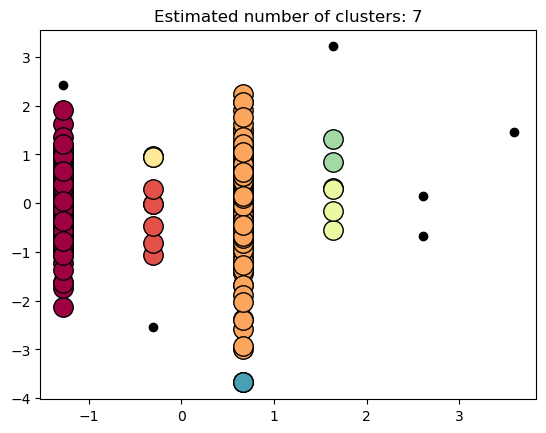

~~~~~~~~~~~~~~ CORRESPONDING OUTLIERS ~~~~~~~~~~~~~~
NUMBER OF OUTLIERS :  6
                                            Book_title      Type    Rating
2         Responsive Web Design Overview For Beginners -0.305136 -2.540962
54                             Your First App: Node.js  1.640556  3.213457
85   How to Think Like a Computer Scientist: Learni...  2.613401  0.146731
95                           Learn Python The Hard Way  2.613401 -0.680252
268  The Art of Computer Programming, Volumes 1-3 B...  3.586247  1.456120
269  The Art of Computer Programming, Volumes 1-4a ... -1.277982  2.420933
~~~~~~~~~~~~~~ PLOTTING FOR COLUMNS 'Type' AND 'Reviews' ~~~~~~~~~~~~~~~~~~~~~


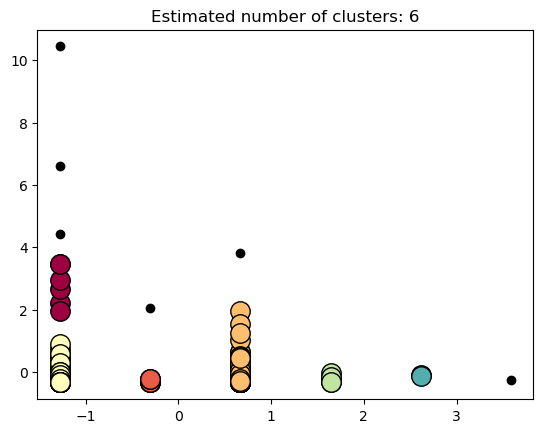

~~~~~~~~~~~~~~ CORRESPONDING OUTLIERS ~~~~~~~~~~~~~~
NUMBER OF OUTLIERS :  6
                                            Book_title      Type    Reviews
0                                The Elements of Style -1.277982   6.611187
4                                     How Google Works -0.305136   2.067569
6    Start with Why: How Great Leaders Inspire Ever... -1.277982  10.438061
45   The Phoenix Project: A Novel About IT, DevOps,... -1.277982   4.433735
90          The Goal: A Process of Ongoing Improvement  0.667710   3.818604
268  The Art of Computer Programming, Volumes 1-3 B...  3.586247  -0.271378


In [11]:
for coli in columns_of_interest:
    for colj in columns_of_interest:
        if coli == colj:
            continue
        dbscan_fit = DBSCAN(eps=0.5, min_samples=2).fit(df[[coli, colj]])
        print(f"~~~~~~~~~~~~~~ PLOTTING FOR COLUMNS '{coli}' AND '{colj}' ~~~~~~~~~~~~~~~~~~~~~")
        plot_DBSCAN(dbscan_fit, np.array(df[[coli, colj]]))
        print("~~~~~~~~~~~~~~ CORRESPONDING OUTLIERS ~~~~~~~~~~~~~~")
        print("NUMBER OF OUTLIERS : ", len(np.where(dbscan_fit.labels_ == -1)[0]))
        print(df[["Book_title", coli, colj]].iloc[np.where(dbscan_fit.labels_ == -1)[0]])
        

~~~~~~~~~~~~~~ PLOTTING FOR COLUMNS 'Price', 'Number_Of_Pages' AND 'Rating' ~~~~~~~~~~~~~~~~~~~~~


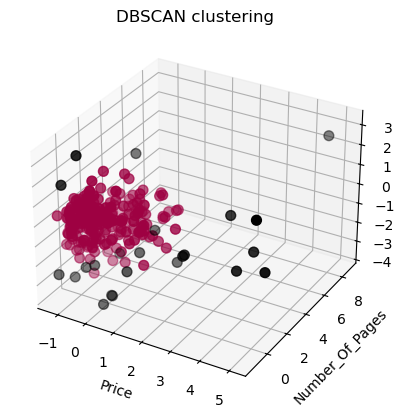

~~~~~~~~~~~~~~ CORRESPONDING OUTLIERS ~~~~~~~~~~~~~~
NUMBER OF OUTLIERS :  23
                                            Book_title     Price  \
2         Responsive Web Design Overview For Beginners -1.214015   
9    ZX Spectrum Games Code Club: Twenty fun games ... -1.119374   
24                       Game Programming Golden Rules -0.992801   
54                             Your First App: Node.js -0.804757   
60          Sams Teach Yourself JavaScript in 24 Hours -0.748814   
86                                    Beginning Java 2 -0.502846   
94                Sams Teach Yourself Perl in 24 Hours -0.457464   
137  The Linux Programming Interface: A Linux and U... -0.229567   
177  Advanced Game Programming: A Gamedev.Net Colle...  0.127379   
182  Cross-Platform Game Programming (Game Developm...  0.164097   
187  Lambda-Calculus, Combinators and Functional Pr...  0.185880   
226  Genetic Programming II: Automatic Discovery of...  0.780625   
227  Optimized C++: Proven Techniques 

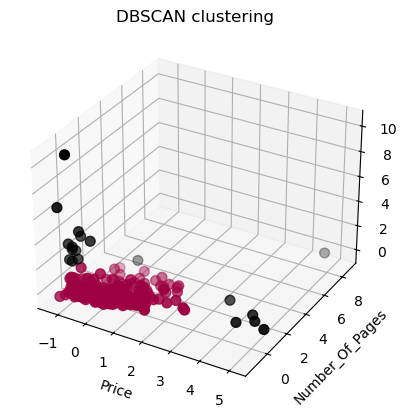

~~~~~~~~~~~~~~ CORRESPONDING OUTLIERS ~~~~~~~~~~~~~~
NUMBER OF OUTLIERS :  19
                                            Book_title     Price  \
0                                The Elements of Style -1.268555   
1        The Information: A History, a Theory, a Flood -1.221524   
3    Ghost in the Wires: My Adventures as the World... -1.168964   
4                                     How Google Works -1.160795   
6    Start with Why: How Great Leaders Inspire Ever... -1.130843   
7    Algorithms to Live By: The Computer Science of... -1.127130   
8    Weapons of Math Destruction: How Big Data Incr... -1.123252   
13       Superintelligence: Paths, Dangers, Strategies -1.090165   
19   The Innovators: How a Group of Hackers, Genius... -1.046764   
23   The Code Book: The Science of Secrecy from Anc... -0.993378   
45   The Phoenix Project: A Novel About IT, DevOps,... -0.849560   
90          The Goal: A Process of Ongoing Improvement -0.488159   
137  The Linux Programming Interface: 

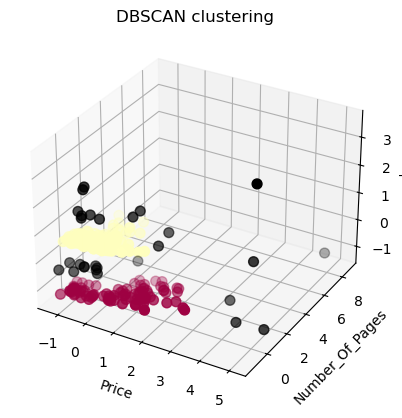

~~~~~~~~~~~~~~ CORRESPONDING OUTLIERS ~~~~~~~~~~~~~~
NUMBER OF OUTLIERS :  28
                                            Book_title     Price  \
2         Responsive Web Design Overview For Beginners -1.214015   
4                                     How Google Works -1.160795   
48   A Smarter Way to Learn JavaScript: The new app... -0.833471   
54                             Your First App: Node.js -0.804757   
58        The Principles of Object-Oriented JavaScript -0.765811   
71   Learn Java the Easy Way : A Hands-On Introduct... -0.646912   
72   Make Your Own Neural Network: An In-depth Visu... -0.639485   
78                                 Algorithms Unlocked -0.566298   
85   How to Think Like a Computer Scientist: Learni... -0.516625   
88                 Learn You a Haskell for Great Good! -0.500536   
95                           Learn Python The Hard Way -0.455732   
104  Simulation of Digital Communication Systems us... -0.371322   
107            From Mathematics to Gen

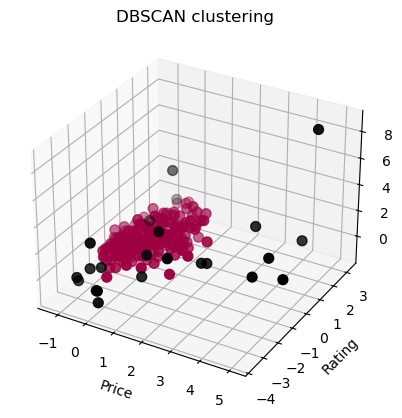

~~~~~~~~~~~~~~ CORRESPONDING OUTLIERS ~~~~~~~~~~~~~~
NUMBER OF OUTLIERS :  23
                                            Book_title     Price    Rating  \
2         Responsive Web Design Overview For Beginners -1.214015 -2.540962   
9    ZX Spectrum Games Code Club: Twenty fun games ... -1.119374  1.904069   
24                       Game Programming Golden Rules -0.992801 -2.988911   
54                             Your First App: Node.js -0.804757  3.213457   
60          Sams Teach Yourself JavaScript in 24 Hours -0.748814 -2.575420   
86                                    Beginning Java 2 -0.502846 -2.919996   
94                Sams Teach Yourself Perl in 24 Hours -0.457464 -2.368674   
137  The Linux Programming Interface: A Linux and U... -0.229567  1.904069   
177  Advanced Game Programming: A Gamedev.Net Colle...  0.127379 -3.678063   
182  Cross-Platform Game Programming (Game Developm...  0.164097 -3.678063   
187  Lambda-Calculus, Combinators and Functional Pr...  0.185880

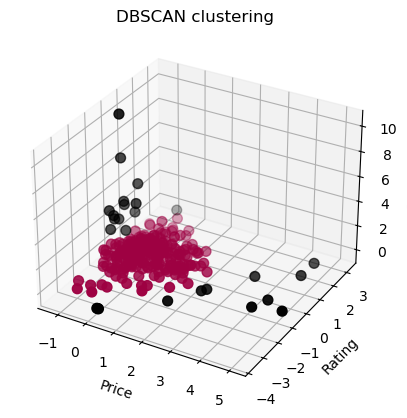

~~~~~~~~~~~~~~ CORRESPONDING OUTLIERS ~~~~~~~~~~~~~~
NUMBER OF OUTLIERS :  26
                                            Book_title     Price    Rating  \
0                                The Elements of Style -1.268555  0.353476   
1        The Information: A History, a Theory, a Flood -1.221524 -0.197845   
3    Ghost in the Wires: My Adventures as the World... -1.168964 -0.335676   
4                                     How Google Works -1.160795 -0.025557   
6    Start with Why: How Great Leaders Inspire Ever... -1.130843  0.077816   
7    Algorithms to Live By: The Computer Science of... -1.127130  0.284561   
8    Weapons of Math Destruction: How Big Data Incr... -1.123252 -0.680252   
13       Superintelligence: Paths, Dangers, Strategies -1.090165 -0.680252   
19   The Innovators: How a Group of Hackers, Genius... -1.046764  0.112273   
23   The Code Book: The Science of Secrecy from Anc... -0.993378  0.732510   
45   The Phoenix Project: A Novel About IT, DevOps,... -0.849560

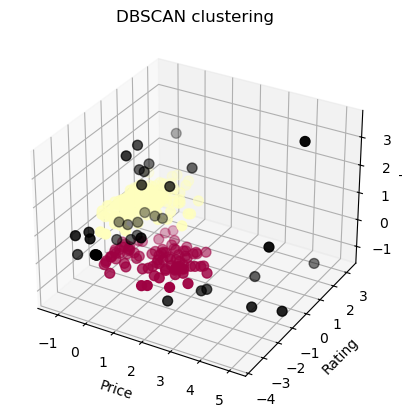

~~~~~~~~~~~~~~ CORRESPONDING OUTLIERS ~~~~~~~~~~~~~~
NUMBER OF OUTLIERS :  35
                                            Book_title     Price    Rating  \
2         Responsive Web Design Overview For Beginners -1.214015 -2.540962   
4                                     How Google Works -1.160795 -0.025557   
24                       Game Programming Golden Rules -0.992801 -2.988911   
48   A Smarter Way to Learn JavaScript: The new app... -0.833471 -0.025557   
54                             Your First App: Node.js -0.804757  3.213457   
58        The Principles of Object-Oriented JavaScript -0.765811  0.973713   
60          Sams Teach Yourself JavaScript in 24 Hours -0.748814 -2.575420   
71   Learn Java the Easy Way : A Hands-On Introduct... -0.646912 -1.059285   
72   Make Your Own Neural Network: An In-depth Visu... -0.639485  0.284561   
78                                 Algorithms Unlocked -0.566298  0.319019   
85   How to Think Like a Computer Scientist: Learni... -0.516625

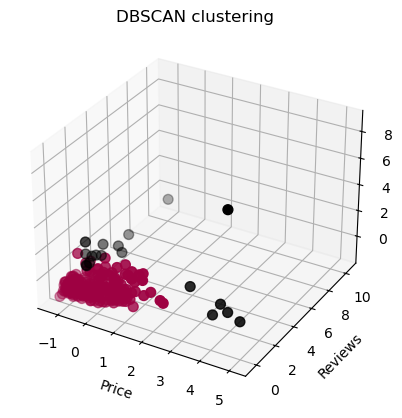

~~~~~~~~~~~~~~ CORRESPONDING OUTLIERS ~~~~~~~~~~~~~~
NUMBER OF OUTLIERS :  19
                                            Book_title     Price    Reviews  \
0                                The Elements of Style -1.268555   6.611187   
1        The Information: A History, a Theory, a Flood -1.221524   2.214547   
3    Ghost in the Wires: My Adventures as the World... -1.168964   2.671812   
4                                     How Google Works -1.160795   2.067569   
6    Start with Why: How Great Leaders Inspire Ever... -1.130843  10.438061   
7    Algorithms to Live By: The Computer Science of... -1.127130   2.960325   
8    Weapons of Math Destruction: How Big Data Incr... -1.123252   3.461139   
13       Superintelligence: Paths, Dangers, Strategies -1.090165   1.940551   
19   The Innovators: How a Group of Hackers, Genius... -1.046764   3.459324   
23   The Code Book: The Science of Secrecy from Anc... -0.993378   1.964140   
45   The Phoenix Project: A Novel About IT, DevOps,..

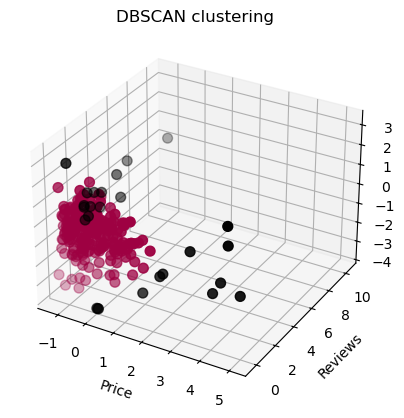

~~~~~~~~~~~~~~ CORRESPONDING OUTLIERS ~~~~~~~~~~~~~~
NUMBER OF OUTLIERS :  26
                                            Book_title     Price    Reviews  \
0                                The Elements of Style -1.268555   6.611187   
1        The Information: A History, a Theory, a Flood -1.221524   2.214547   
3    Ghost in the Wires: My Adventures as the World... -1.168964   2.671812   
4                                     How Google Works -1.160795   2.067569   
6    Start with Why: How Great Leaders Inspire Ever... -1.130843  10.438061   
7    Algorithms to Live By: The Computer Science of... -1.127130   2.960325   
8    Weapons of Math Destruction: How Big Data Incr... -1.123252   3.461139   
13       Superintelligence: Paths, Dangers, Strategies -1.090165   1.940551   
19   The Innovators: How a Group of Hackers, Genius... -1.046764   3.459324   
23   The Code Book: The Science of Secrecy from Anc... -0.993378   1.964140   
45   The Phoenix Project: A Novel About IT, DevOps,..

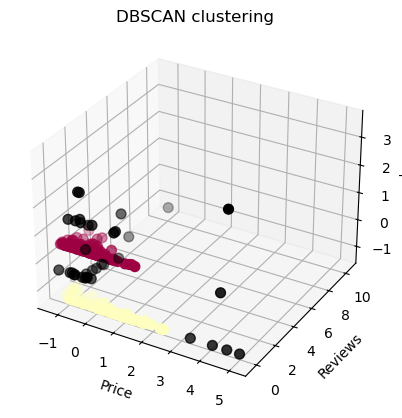

~~~~~~~~~~~~~~ CORRESPONDING OUTLIERS ~~~~~~~~~~~~~~
NUMBER OF OUTLIERS :  36
                                            Book_title     Price    Reviews  \
0                                The Elements of Style -1.268555   6.611187   
1        The Information: A History, a Theory, a Flood -1.221524   2.214547   
2         Responsive Web Design Overview For Beginners -1.214015  -0.336702   
3    Ghost in the Wires: My Adventures as the World... -1.168964   2.671812   
4                                     How Google Works -1.160795   2.067569   
6    Start with Why: How Great Leaders Inspire Ever... -1.130843  10.438061   
7    Algorithms to Live By: The Computer Science of... -1.127130   2.960325   
8    Weapons of Math Destruction: How Big Data Incr... -1.123252   3.461139   
13       Superintelligence: Paths, Dangers, Strategies -1.090165   1.940551   
19   The Innovators: How a Group of Hackers, Genius... -1.046764   3.459324   
23   The Code Book: The Science of Secrecy from Anc..

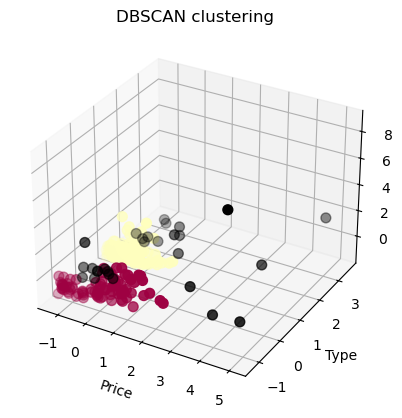

~~~~~~~~~~~~~~ CORRESPONDING OUTLIERS ~~~~~~~~~~~~~~
NUMBER OF OUTLIERS :  28
                                            Book_title     Price      Type  \
2         Responsive Web Design Overview For Beginners -1.214015 -0.305136   
4                                     How Google Works -1.160795 -0.305136   
48   A Smarter Way to Learn JavaScript: The new app... -0.833471 -0.305136   
54                             Your First App: Node.js -0.804757  1.640556   
58        The Principles of Object-Oriented JavaScript -0.765811 -0.305136   
71   Learn Java the Easy Way : A Hands-On Introduct... -0.646912 -0.305136   
72   Make Your Own Neural Network: An In-depth Visu... -0.639485 -0.305136   
78                                 Algorithms Unlocked -0.566298  1.640556   
85   How to Think Like a Computer Scientist: Learni... -0.516625  2.613401   
88                 Learn You a Haskell for Great Good! -0.500536  1.640556   
95                           Learn Python The Hard Way -0.455732

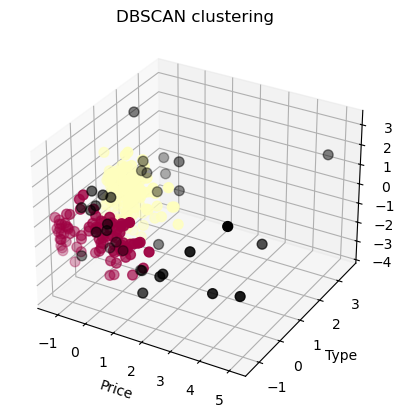

~~~~~~~~~~~~~~ CORRESPONDING OUTLIERS ~~~~~~~~~~~~~~
NUMBER OF OUTLIERS :  35
                                            Book_title     Price      Type  \
2         Responsive Web Design Overview For Beginners -1.214015 -0.305136   
4                                     How Google Works -1.160795 -0.305136   
24                       Game Programming Golden Rules -0.992801  0.667710   
48   A Smarter Way to Learn JavaScript: The new app... -0.833471 -0.305136   
54                             Your First App: Node.js -0.804757  1.640556   
58        The Principles of Object-Oriented JavaScript -0.765811 -0.305136   
60          Sams Teach Yourself JavaScript in 24 Hours -0.748814  0.667710   
71   Learn Java the Easy Way : A Hands-On Introduct... -0.646912 -0.305136   
72   Make Your Own Neural Network: An In-depth Visu... -0.639485 -0.305136   
78                                 Algorithms Unlocked -0.566298  1.640556   
85   How to Think Like a Computer Scientist: Learni... -0.516625

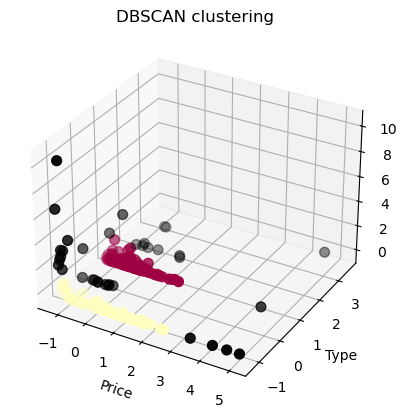

~~~~~~~~~~~~~~ CORRESPONDING OUTLIERS ~~~~~~~~~~~~~~
NUMBER OF OUTLIERS :  36
                                            Book_title     Price      Type  \
0                                The Elements of Style -1.268555 -1.277982   
1        The Information: A History, a Theory, a Flood -1.221524 -1.277982   
2         Responsive Web Design Overview For Beginners -1.214015 -0.305136   
3    Ghost in the Wires: My Adventures as the World... -1.168964 -1.277982   
4                                     How Google Works -1.160795 -0.305136   
6    Start with Why: How Great Leaders Inspire Ever... -1.130843 -1.277982   
7    Algorithms to Live By: The Computer Science of... -1.127130 -1.277982   
8    Weapons of Math Destruction: How Big Data Incr... -1.123252 -1.277982   
13       Superintelligence: Paths, Dangers, Strategies -1.090165 -1.277982   
19   The Innovators: How a Group of Hackers, Genius... -1.046764 -1.277982   
23   The Code Book: The Science of Secrecy from Anc... -0.993378

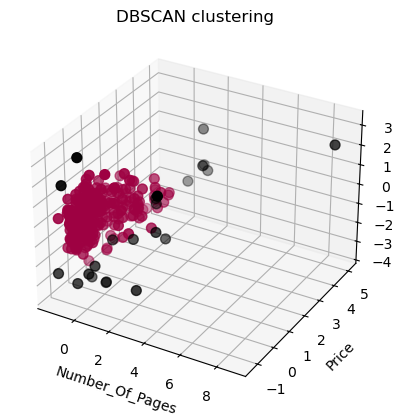

~~~~~~~~~~~~~~ CORRESPONDING OUTLIERS ~~~~~~~~~~~~~~
NUMBER OF OUTLIERS :  23
                                            Book_title  Number_Of_Pages  \
2         Responsive Web Design Overview For Beginners        -1.391042   
9    ZX Spectrum Games Code Club: Twenty fun games ...        -1.135791   
24                       Game Programming Golden Rules        -0.514027   
54                             Your First App: Node.js        -0.517300   
60          Sams Teach Yourself JavaScript in 24 Hours        -0.108244   
86                                    Beginning Java 2         2.372267   
94                Sams Teach Yourself Perl in 24 Hours        -0.042795   
137  The Linux Programming Interface: A Linux and U...         3.373635   
177  Advanced Game Programming: A Gamedev.Net Colle...        -0.036250   
182  Cross-Platform Game Programming (Game Developm...        -0.049340   
187  Lambda-Calculus, Combinators and Functional Pr...        -0.926355   
226  Genetic Programmi

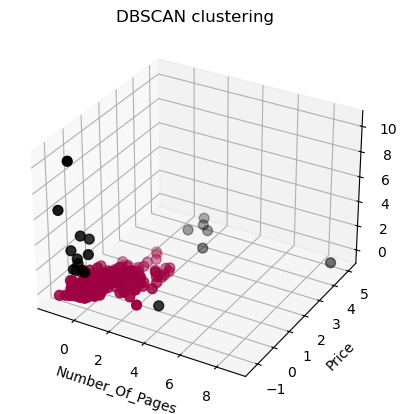

~~~~~~~~~~~~~~ CORRESPONDING OUTLIERS ~~~~~~~~~~~~~~
NUMBER OF OUTLIERS :  19
                                            Book_title  Number_Of_Pages  \
0                                The Elements of Style        -1.211057   
1        The Information: A History, a Theory, a Flood         0.169913   
3    Ghost in the Wires: My Adventures as the World...        -0.268594   
4                                     How Google Works        -0.556569   
6    Start with Why: How Great Leaders Inspire Ever...        -0.716919   
7    Algorithms to Live By: The Computer Science of...        -0.350405   
8    Weapons of Math Destruction: How Big Data Incr...        -0.707101   
13       Superintelligence: Paths, Dangers, Strategies        -0.481303   
19   The Innovators: How a Group of Hackers, Genius...         0.219000   
23   The Code Book: The Science of Secrecy from Anc...        -0.206417   
45   The Phoenix Project: A Novel About IT, DevOps,...        -0.425671   
90          The Goal: 

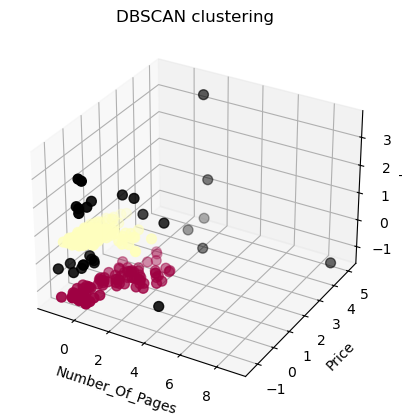

~~~~~~~~~~~~~~ CORRESPONDING OUTLIERS ~~~~~~~~~~~~~~
NUMBER OF OUTLIERS :  28
                                            Book_title  Number_Of_Pages  \
2         Responsive Web Design Overview For Beginners        -1.391042   
4                                     How Google Works        -0.556569   
48   A Smarter Way to Learn JavaScript: The new app...        -0.432216   
54                             Your First App: Node.js        -0.517300   
58        The Principles of Object-Oriented JavaScript        -1.161971   
71   Learn Java the Easy Way : A Hands-On Introduct...        -0.533662   
72   Make Your Own Neural Network: An In-depth Visu...        -0.520572   
78                                 Algorithms Unlocked        -0.779095   
85   How to Think Like a Computer Scientist: Learni...        -0.612200   
88                 Learn You a Haskell for Great Good!        -0.978714   
95                           Learn Python The Hard Way        -0.867451   
104  Simulation of Dig

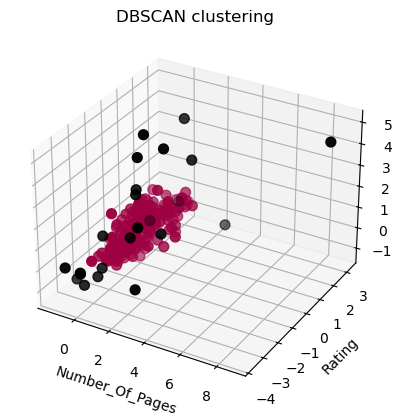

~~~~~~~~~~~~~~ CORRESPONDING OUTLIERS ~~~~~~~~~~~~~~
NUMBER OF OUTLIERS :  23
                                            Book_title  Number_Of_Pages  \
2         Responsive Web Design Overview For Beginners        -1.391042   
9    ZX Spectrum Games Code Club: Twenty fun games ...        -1.135791   
24                       Game Programming Golden Rules        -0.514027   
54                             Your First App: Node.js        -0.517300   
60          Sams Teach Yourself JavaScript in 24 Hours        -0.108244   
86                                    Beginning Java 2         2.372267   
94                Sams Teach Yourself Perl in 24 Hours        -0.042795   
137  The Linux Programming Interface: A Linux and U...         3.373635   
177  Advanced Game Programming: A Gamedev.Net Colle...        -0.036250   
182  Cross-Platform Game Programming (Game Developm...        -0.049340   
187  Lambda-Calculus, Combinators and Functional Pr...        -0.926355   
226  Genetic Programmi

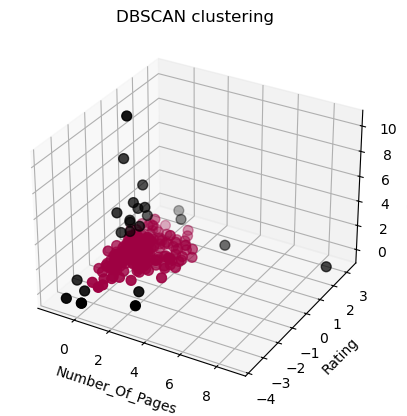

~~~~~~~~~~~~~~ CORRESPONDING OUTLIERS ~~~~~~~~~~~~~~
NUMBER OF OUTLIERS :  24
                                            Book_title  Number_Of_Pages  \
0                                The Elements of Style        -1.211057   
1        The Information: A History, a Theory, a Flood         0.169913   
2         Responsive Web Design Overview For Beginners        -1.391042   
3    Ghost in the Wires: My Adventures as the World...        -0.268594   
4                                     How Google Works        -0.556569   
6    Start with Why: How Great Leaders Inspire Ever...        -0.716919   
7    Algorithms to Live By: The Computer Science of...        -0.350405   
8    Weapons of Math Destruction: How Big Data Incr...        -0.707101   
13       Superintelligence: Paths, Dangers, Strategies        -0.481303   
19   The Innovators: How a Group of Hackers, Genius...         0.219000   
23   The Code Book: The Science of Secrecy from Anc...        -0.206417   
24                    

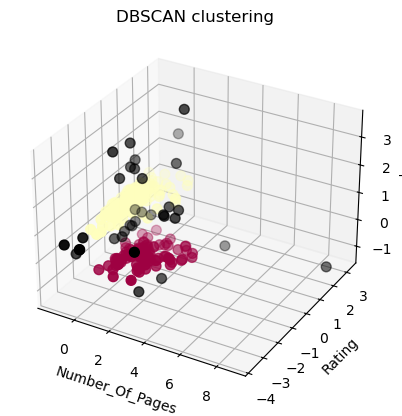

~~~~~~~~~~~~~~ CORRESPONDING OUTLIERS ~~~~~~~~~~~~~~
NUMBER OF OUTLIERS :  34
                                            Book_title  Number_Of_Pages  \
2         Responsive Web Design Overview For Beginners        -1.391042   
4                                     How Google Works        -0.556569   
24                       Game Programming Golden Rules        -0.514027   
48   A Smarter Way to Learn JavaScript: The new app...        -0.432216   
54                             Your First App: Node.js        -0.517300   
58        The Principles of Object-Oriented JavaScript        -1.161971   
71   Learn Java the Easy Way : A Hands-On Introduct...        -0.533662   
72   Make Your Own Neural Network: An In-depth Visu...        -0.520572   
78                                 Algorithms Unlocked        -0.779095   
85   How to Think Like a Computer Scientist: Learni...        -0.612200   
86                                    Beginning Java 2         2.372267   
88                 Lea

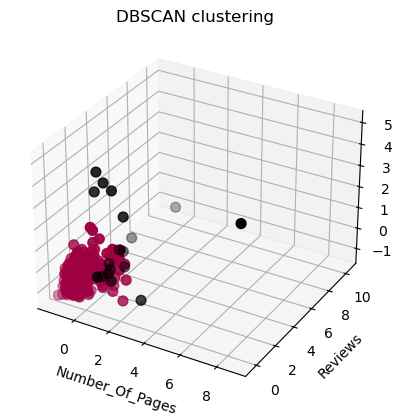

~~~~~~~~~~~~~~ CORRESPONDING OUTLIERS ~~~~~~~~~~~~~~
NUMBER OF OUTLIERS :  19
                                            Book_title  Number_Of_Pages  \
0                                The Elements of Style        -1.211057   
1        The Information: A History, a Theory, a Flood         0.169913   
3    Ghost in the Wires: My Adventures as the World...        -0.268594   
4                                     How Google Works        -0.556569   
6    Start with Why: How Great Leaders Inspire Ever...        -0.716919   
7    Algorithms to Live By: The Computer Science of...        -0.350405   
8    Weapons of Math Destruction: How Big Data Incr...        -0.707101   
13       Superintelligence: Paths, Dangers, Strategies        -0.481303   
19   The Innovators: How a Group of Hackers, Genius...         0.219000   
23   The Code Book: The Science of Secrecy from Anc...        -0.206417   
45   The Phoenix Project: A Novel About IT, DevOps,...        -0.425671   
90          The Goal: 

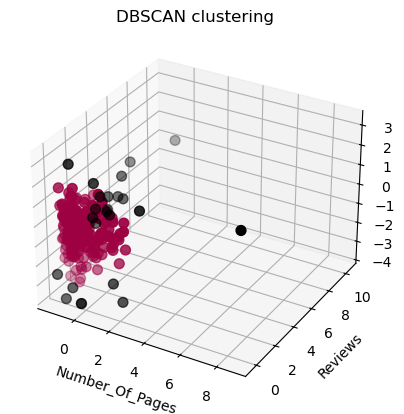

~~~~~~~~~~~~~~ CORRESPONDING OUTLIERS ~~~~~~~~~~~~~~
NUMBER OF OUTLIERS :  24
                                            Book_title  Number_Of_Pages  \
0                                The Elements of Style        -1.211057   
1        The Information: A History, a Theory, a Flood         0.169913   
2         Responsive Web Design Overview For Beginners        -1.391042   
3    Ghost in the Wires: My Adventures as the World...        -0.268594   
4                                     How Google Works        -0.556569   
6    Start with Why: How Great Leaders Inspire Ever...        -0.716919   
7    Algorithms to Live By: The Computer Science of...        -0.350405   
8    Weapons of Math Destruction: How Big Data Incr...        -0.707101   
13       Superintelligence: Paths, Dangers, Strategies        -0.481303   
19   The Innovators: How a Group of Hackers, Genius...         0.219000   
23   The Code Book: The Science of Secrecy from Anc...        -0.206417   
24                    

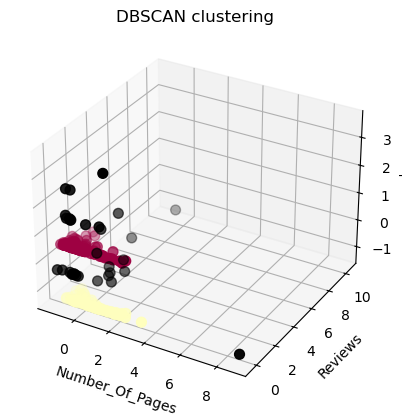

~~~~~~~~~~~~~~ CORRESPONDING OUTLIERS ~~~~~~~~~~~~~~
NUMBER OF OUTLIERS :  32
                                            Book_title  Number_Of_Pages  \
0                                The Elements of Style        -1.211057   
1        The Information: A History, a Theory, a Flood         0.169913   
2         Responsive Web Design Overview For Beginners        -1.391042   
3    Ghost in the Wires: My Adventures as the World...        -0.268594   
4                                     How Google Works        -0.556569   
6    Start with Why: How Great Leaders Inspire Ever...        -0.716919   
7    Algorithms to Live By: The Computer Science of...        -0.350405   
8    Weapons of Math Destruction: How Big Data Incr...        -0.707101   
13       Superintelligence: Paths, Dangers, Strategies        -0.481303   
19   The Innovators: How a Group of Hackers, Genius...         0.219000   
23   The Code Book: The Science of Secrecy from Anc...        -0.206417   
45   The Phoenix Proje

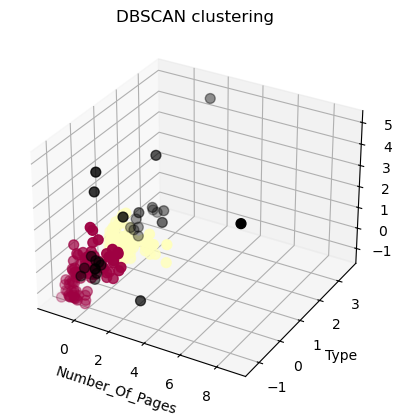

~~~~~~~~~~~~~~ CORRESPONDING OUTLIERS ~~~~~~~~~~~~~~
NUMBER OF OUTLIERS :  28
                                            Book_title  Number_Of_Pages  \
2         Responsive Web Design Overview For Beginners        -1.391042   
4                                     How Google Works        -0.556569   
48   A Smarter Way to Learn JavaScript: The new app...        -0.432216   
54                             Your First App: Node.js        -0.517300   
58        The Principles of Object-Oriented JavaScript        -1.161971   
71   Learn Java the Easy Way : A Hands-On Introduct...        -0.533662   
72   Make Your Own Neural Network: An In-depth Visu...        -0.520572   
78                                 Algorithms Unlocked        -0.779095   
85   How to Think Like a Computer Scientist: Learni...        -0.612200   
88                 Learn You a Haskell for Great Good!        -0.978714   
95                           Learn Python The Hard Way        -0.867451   
104  Simulation of Dig

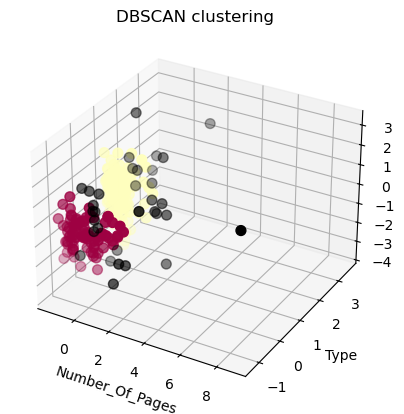

~~~~~~~~~~~~~~ CORRESPONDING OUTLIERS ~~~~~~~~~~~~~~
NUMBER OF OUTLIERS :  34
                                            Book_title  Number_Of_Pages  \
2         Responsive Web Design Overview For Beginners        -1.391042   
4                                     How Google Works        -0.556569   
24                       Game Programming Golden Rules        -0.514027   
48   A Smarter Way to Learn JavaScript: The new app...        -0.432216   
54                             Your First App: Node.js        -0.517300   
58        The Principles of Object-Oriented JavaScript        -1.161971   
71   Learn Java the Easy Way : A Hands-On Introduct...        -0.533662   
72   Make Your Own Neural Network: An In-depth Visu...        -0.520572   
78                                 Algorithms Unlocked        -0.779095   
85   How to Think Like a Computer Scientist: Learni...        -0.612200   
86                                    Beginning Java 2         2.372267   
88                 Lea

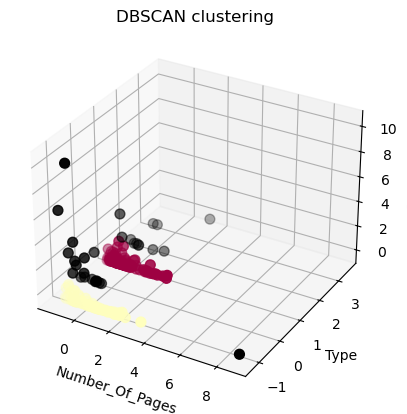

~~~~~~~~~~~~~~ CORRESPONDING OUTLIERS ~~~~~~~~~~~~~~
NUMBER OF OUTLIERS :  32
                                            Book_title  Number_Of_Pages  \
0                                The Elements of Style        -1.211057   
1        The Information: A History, a Theory, a Flood         0.169913   
2         Responsive Web Design Overview For Beginners        -1.391042   
3    Ghost in the Wires: My Adventures as the World...        -0.268594   
4                                     How Google Works        -0.556569   
6    Start with Why: How Great Leaders Inspire Ever...        -0.716919   
7    Algorithms to Live By: The Computer Science of...        -0.350405   
8    Weapons of Math Destruction: How Big Data Incr...        -0.707101   
13       Superintelligence: Paths, Dangers, Strategies        -0.481303   
19   The Innovators: How a Group of Hackers, Genius...         0.219000   
23   The Code Book: The Science of Secrecy from Anc...        -0.206417   
45   The Phoenix Proje

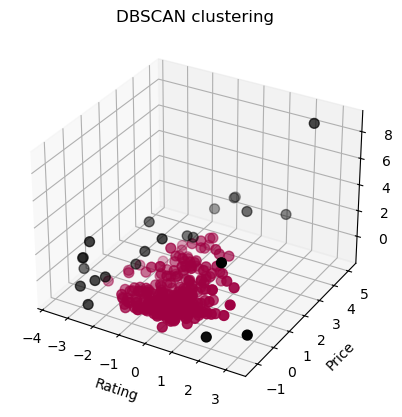

~~~~~~~~~~~~~~ CORRESPONDING OUTLIERS ~~~~~~~~~~~~~~
NUMBER OF OUTLIERS :  23
                                            Book_title    Rating     Price  \
2         Responsive Web Design Overview For Beginners -2.540962 -1.214015   
9    ZX Spectrum Games Code Club: Twenty fun games ...  1.904069 -1.119374   
24                       Game Programming Golden Rules -2.988911 -0.992801   
54                             Your First App: Node.js  3.213457 -0.804757   
60          Sams Teach Yourself JavaScript in 24 Hours -2.575420 -0.748814   
86                                    Beginning Java 2 -2.919996 -0.502846   
94                Sams Teach Yourself Perl in 24 Hours -2.368674 -0.457464   
137  The Linux Programming Interface: A Linux and U...  1.904069 -0.229567   
177  Advanced Game Programming: A Gamedev.Net Colle... -3.678063  0.127379   
182  Cross-Platform Game Programming (Game Developm... -3.678063  0.164097   
187  Lambda-Calculus, Combinators and Functional Pr... -3.678063

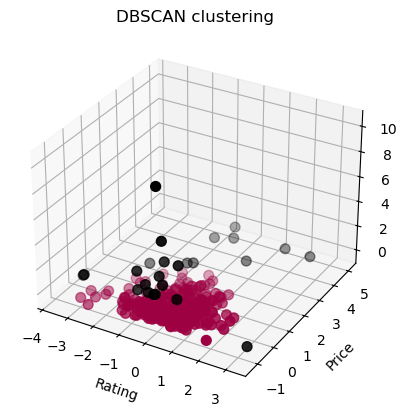

~~~~~~~~~~~~~~ CORRESPONDING OUTLIERS ~~~~~~~~~~~~~~
NUMBER OF OUTLIERS :  26
                                            Book_title    Rating     Price  \
0                                The Elements of Style  0.353476 -1.268555   
1        The Information: A History, a Theory, a Flood -0.197845 -1.221524   
3    Ghost in the Wires: My Adventures as the World... -0.335676 -1.168964   
4                                     How Google Works -0.025557 -1.160795   
6    Start with Why: How Great Leaders Inspire Ever...  0.077816 -1.130843   
7    Algorithms to Live By: The Computer Science of...  0.284561 -1.127130   
8    Weapons of Math Destruction: How Big Data Incr... -0.680252 -1.123252   
13       Superintelligence: Paths, Dangers, Strategies -0.680252 -1.090165   
19   The Innovators: How a Group of Hackers, Genius...  0.112273 -1.046764   
23   The Code Book: The Science of Secrecy from Anc...  0.732510 -0.993378   
45   The Phoenix Project: A Novel About IT, DevOps,...  0.698053

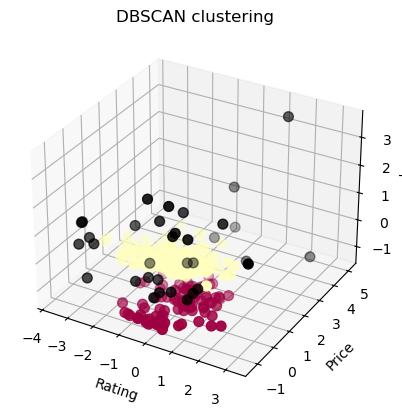

~~~~~~~~~~~~~~ CORRESPONDING OUTLIERS ~~~~~~~~~~~~~~
NUMBER OF OUTLIERS :  35
                                            Book_title    Rating     Price  \
2         Responsive Web Design Overview For Beginners -2.540962 -1.214015   
4                                     How Google Works -0.025557 -1.160795   
24                       Game Programming Golden Rules -2.988911 -0.992801   
48   A Smarter Way to Learn JavaScript: The new app... -0.025557 -0.833471   
54                             Your First App: Node.js  3.213457 -0.804757   
58        The Principles of Object-Oriented JavaScript  0.973713 -0.765811   
60          Sams Teach Yourself JavaScript in 24 Hours -2.575420 -0.748814   
71   Learn Java the Easy Way : A Hands-On Introduct... -1.059285 -0.646912   
72   Make Your Own Neural Network: An In-depth Visu...  0.284561 -0.639485   
78                                 Algorithms Unlocked  0.319019 -0.566298   
85   How to Think Like a Computer Scientist: Learni...  0.146731

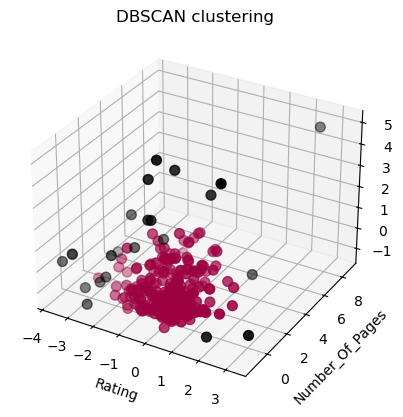

~~~~~~~~~~~~~~ CORRESPONDING OUTLIERS ~~~~~~~~~~~~~~
NUMBER OF OUTLIERS :  23
                                            Book_title    Rating  \
2         Responsive Web Design Overview For Beginners -2.540962   
9    ZX Spectrum Games Code Club: Twenty fun games ...  1.904069   
24                       Game Programming Golden Rules -2.988911   
54                             Your First App: Node.js  3.213457   
60          Sams Teach Yourself JavaScript in 24 Hours -2.575420   
86                                    Beginning Java 2 -2.919996   
94                Sams Teach Yourself Perl in 24 Hours -2.368674   
137  The Linux Programming Interface: A Linux and U...  1.904069   
177  Advanced Game Programming: A Gamedev.Net Colle... -3.678063   
182  Cross-Platform Game Programming (Game Developm... -3.678063   
187  Lambda-Calculus, Combinators and Functional Pr... -3.678063   
226  Genetic Programming II: Automatic Discovery of... -1.645064   
227  Optimized C++: Proven Techniques 

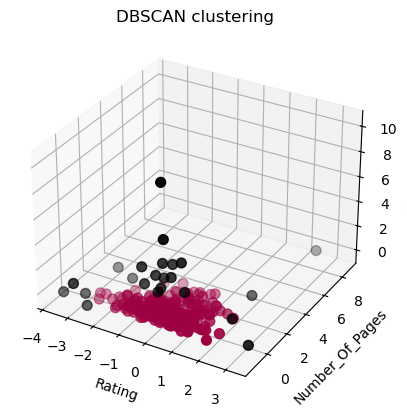

~~~~~~~~~~~~~~ CORRESPONDING OUTLIERS ~~~~~~~~~~~~~~
NUMBER OF OUTLIERS :  24
                                            Book_title    Rating  \
0                                The Elements of Style  0.353476   
1        The Information: A History, a Theory, a Flood -0.197845   
2         Responsive Web Design Overview For Beginners -2.540962   
3    Ghost in the Wires: My Adventures as the World... -0.335676   
4                                     How Google Works -0.025557   
6    Start with Why: How Great Leaders Inspire Ever...  0.077816   
7    Algorithms to Live By: The Computer Science of...  0.284561   
8    Weapons of Math Destruction: How Big Data Incr... -0.680252   
13       Superintelligence: Paths, Dangers, Strategies -0.680252   
19   The Innovators: How a Group of Hackers, Genius...  0.112273   
23   The Code Book: The Science of Secrecy from Anc...  0.732510   
24                       Game Programming Golden Rules -2.988911   
45   The Phoenix Project: A Novel Abou

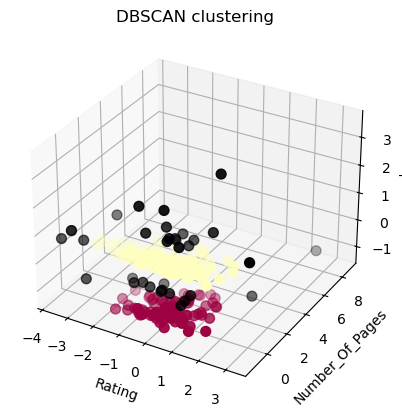

~~~~~~~~~~~~~~ CORRESPONDING OUTLIERS ~~~~~~~~~~~~~~
NUMBER OF OUTLIERS :  34
                                            Book_title    Rating  \
2         Responsive Web Design Overview For Beginners -2.540962   
4                                     How Google Works -0.025557   
24                       Game Programming Golden Rules -2.988911   
48   A Smarter Way to Learn JavaScript: The new app... -0.025557   
54                             Your First App: Node.js  3.213457   
58        The Principles of Object-Oriented JavaScript  0.973713   
71   Learn Java the Easy Way : A Hands-On Introduct... -1.059285   
72   Make Your Own Neural Network: An In-depth Visu...  0.284561   
78                                 Algorithms Unlocked  0.319019   
85   How to Think Like a Computer Scientist: Learni...  0.146731   
86                                    Beginning Java 2 -2.919996   
88                 Learn You a Haskell for Great Good!  0.835883   
95                           Learn Pyt

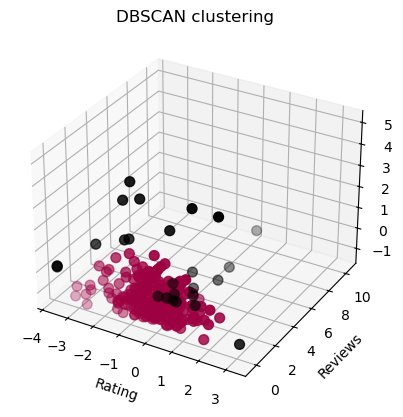

~~~~~~~~~~~~~~ CORRESPONDING OUTLIERS ~~~~~~~~~~~~~~
NUMBER OF OUTLIERS :  26
                                            Book_title    Rating    Reviews  \
0                                The Elements of Style  0.353476   6.611187   
1        The Information: A History, a Theory, a Flood -0.197845   2.214547   
3    Ghost in the Wires: My Adventures as the World... -0.335676   2.671812   
4                                     How Google Works -0.025557   2.067569   
6    Start with Why: How Great Leaders Inspire Ever...  0.077816  10.438061   
7    Algorithms to Live By: The Computer Science of...  0.284561   2.960325   
8    Weapons of Math Destruction: How Big Data Incr... -0.680252   3.461139   
13       Superintelligence: Paths, Dangers, Strategies -0.680252   1.940551   
19   The Innovators: How a Group of Hackers, Genius...  0.112273   3.459324   
23   The Code Book: The Science of Secrecy from Anc...  0.732510   1.964140   
45   The Phoenix Project: A Novel About IT, DevOps,..

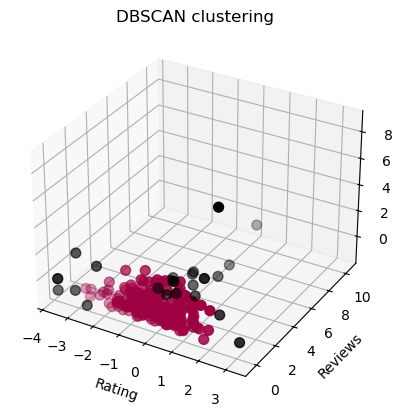

~~~~~~~~~~~~~~ CORRESPONDING OUTLIERS ~~~~~~~~~~~~~~
NUMBER OF OUTLIERS :  24
                                            Book_title    Rating    Reviews  \
0                                The Elements of Style  0.353476   6.611187   
1        The Information: A History, a Theory, a Flood -0.197845   2.214547   
2         Responsive Web Design Overview For Beginners -2.540962  -0.336702   
3    Ghost in the Wires: My Adventures as the World... -0.335676   2.671812   
4                                     How Google Works -0.025557   2.067569   
6    Start with Why: How Great Leaders Inspire Ever...  0.077816  10.438061   
7    Algorithms to Live By: The Computer Science of...  0.284561   2.960325   
8    Weapons of Math Destruction: How Big Data Incr... -0.680252   3.461139   
13       Superintelligence: Paths, Dangers, Strategies -0.680252   1.940551   
19   The Innovators: How a Group of Hackers, Genius...  0.112273   3.459324   
23   The Code Book: The Science of Secrecy from Anc..

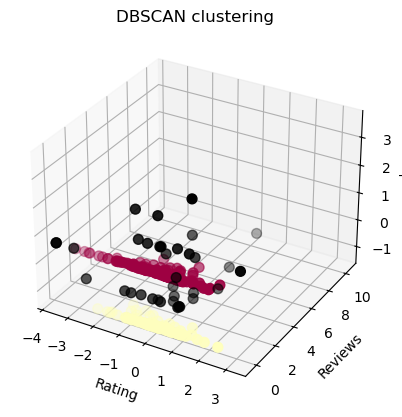

~~~~~~~~~~~~~~ CORRESPONDING OUTLIERS ~~~~~~~~~~~~~~
NUMBER OF OUTLIERS :  36
                                            Book_title    Rating    Reviews  \
0                                The Elements of Style  0.353476   6.611187   
1        The Information: A History, a Theory, a Flood -0.197845   2.214547   
2         Responsive Web Design Overview For Beginners -2.540962  -0.336702   
3    Ghost in the Wires: My Adventures as the World... -0.335676   2.671812   
4                                     How Google Works -0.025557   2.067569   
6    Start with Why: How Great Leaders Inspire Ever...  0.077816  10.438061   
7    Algorithms to Live By: The Computer Science of...  0.284561   2.960325   
8    Weapons of Math Destruction: How Big Data Incr... -0.680252   3.461139   
13       Superintelligence: Paths, Dangers, Strategies -0.680252   1.940551   
19   The Innovators: How a Group of Hackers, Genius...  0.112273   3.459324   
23   The Code Book: The Science of Secrecy from Anc..

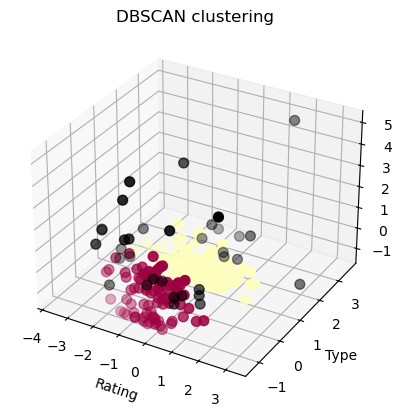

~~~~~~~~~~~~~~ CORRESPONDING OUTLIERS ~~~~~~~~~~~~~~
NUMBER OF OUTLIERS :  35
                                            Book_title    Rating      Type  \
2         Responsive Web Design Overview For Beginners -2.540962 -0.305136   
4                                     How Google Works -0.025557 -0.305136   
24                       Game Programming Golden Rules -2.988911  0.667710   
48   A Smarter Way to Learn JavaScript: The new app... -0.025557 -0.305136   
54                             Your First App: Node.js  3.213457  1.640556   
58        The Principles of Object-Oriented JavaScript  0.973713 -0.305136   
60          Sams Teach Yourself JavaScript in 24 Hours -2.575420  0.667710   
71   Learn Java the Easy Way : A Hands-On Introduct... -1.059285 -0.305136   
72   Make Your Own Neural Network: An In-depth Visu...  0.284561 -0.305136   
78                                 Algorithms Unlocked  0.319019  1.640556   
85   How to Think Like a Computer Scientist: Learni...  0.146731

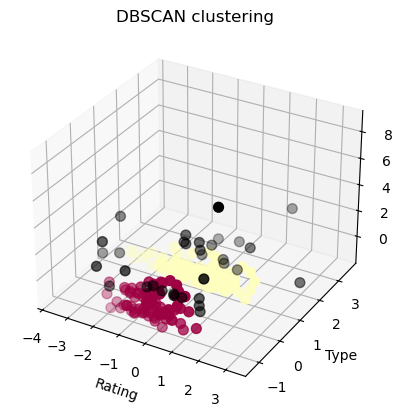

~~~~~~~~~~~~~~ CORRESPONDING OUTLIERS ~~~~~~~~~~~~~~
NUMBER OF OUTLIERS :  34
                                            Book_title    Rating      Type  \
2         Responsive Web Design Overview For Beginners -2.540962 -0.305136   
4                                     How Google Works -0.025557 -0.305136   
24                       Game Programming Golden Rules -2.988911  0.667710   
48   A Smarter Way to Learn JavaScript: The new app... -0.025557 -0.305136   
54                             Your First App: Node.js  3.213457  1.640556   
58        The Principles of Object-Oriented JavaScript  0.973713 -0.305136   
71   Learn Java the Easy Way : A Hands-On Introduct... -1.059285 -0.305136   
72   Make Your Own Neural Network: An In-depth Visu...  0.284561 -0.305136   
78                                 Algorithms Unlocked  0.319019  1.640556   
85   How to Think Like a Computer Scientist: Learni...  0.146731  2.613401   
86                                    Beginning Java 2 -2.919996

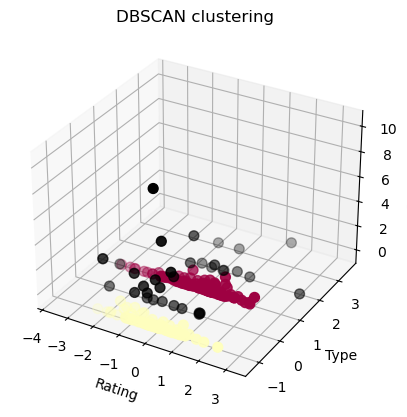

~~~~~~~~~~~~~~ CORRESPONDING OUTLIERS ~~~~~~~~~~~~~~
NUMBER OF OUTLIERS :  36
                                            Book_title    Rating      Type  \
0                                The Elements of Style  0.353476 -1.277982   
1        The Information: A History, a Theory, a Flood -0.197845 -1.277982   
2         Responsive Web Design Overview For Beginners -2.540962 -0.305136   
3    Ghost in the Wires: My Adventures as the World... -0.335676 -1.277982   
4                                     How Google Works -0.025557 -0.305136   
6    Start with Why: How Great Leaders Inspire Ever...  0.077816 -1.277982   
7    Algorithms to Live By: The Computer Science of...  0.284561 -1.277982   
8    Weapons of Math Destruction: How Big Data Incr... -0.680252 -1.277982   
13       Superintelligence: Paths, Dangers, Strategies -0.680252 -1.277982   
19   The Innovators: How a Group of Hackers, Genius...  0.112273 -1.277982   
23   The Code Book: The Science of Secrecy from Anc...  0.732510

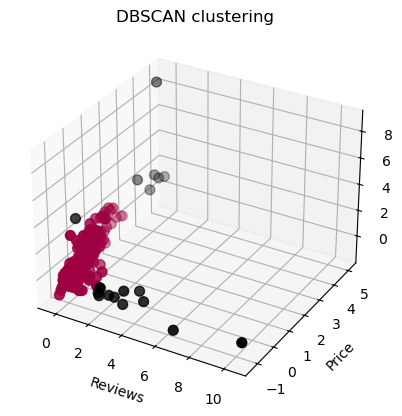

~~~~~~~~~~~~~~ CORRESPONDING OUTLIERS ~~~~~~~~~~~~~~
NUMBER OF OUTLIERS :  19
                                            Book_title    Reviews     Price  \
0                                The Elements of Style   6.611187 -1.268555   
1        The Information: A History, a Theory, a Flood   2.214547 -1.221524   
3    Ghost in the Wires: My Adventures as the World...   2.671812 -1.168964   
4                                     How Google Works   2.067569 -1.160795   
6    Start with Why: How Great Leaders Inspire Ever...  10.438061 -1.130843   
7    Algorithms to Live By: The Computer Science of...   2.960325 -1.127130   
8    Weapons of Math Destruction: How Big Data Incr...   3.461139 -1.123252   
13       Superintelligence: Paths, Dangers, Strategies   1.940551 -1.090165   
19   The Innovators: How a Group of Hackers, Genius...   3.459324 -1.046764   
23   The Code Book: The Science of Secrecy from Anc...   1.964140 -0.993378   
45   The Phoenix Project: A Novel About IT, DevOps,..

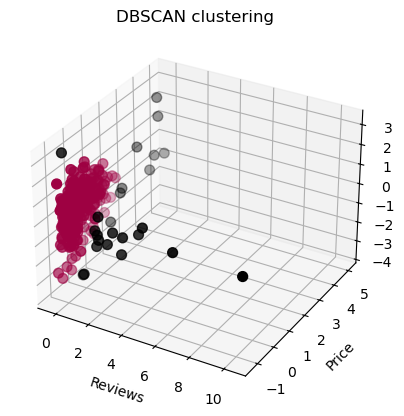

~~~~~~~~~~~~~~ CORRESPONDING OUTLIERS ~~~~~~~~~~~~~~
NUMBER OF OUTLIERS :  26
                                            Book_title    Reviews     Price  \
0                                The Elements of Style   6.611187 -1.268555   
1        The Information: A History, a Theory, a Flood   2.214547 -1.221524   
3    Ghost in the Wires: My Adventures as the World...   2.671812 -1.168964   
4                                     How Google Works   2.067569 -1.160795   
6    Start with Why: How Great Leaders Inspire Ever...  10.438061 -1.130843   
7    Algorithms to Live By: The Computer Science of...   2.960325 -1.127130   
8    Weapons of Math Destruction: How Big Data Incr...   3.461139 -1.123252   
13       Superintelligence: Paths, Dangers, Strategies   1.940551 -1.090165   
19   The Innovators: How a Group of Hackers, Genius...   3.459324 -1.046764   
23   The Code Book: The Science of Secrecy from Anc...   1.964140 -0.993378   
45   The Phoenix Project: A Novel About IT, DevOps,..

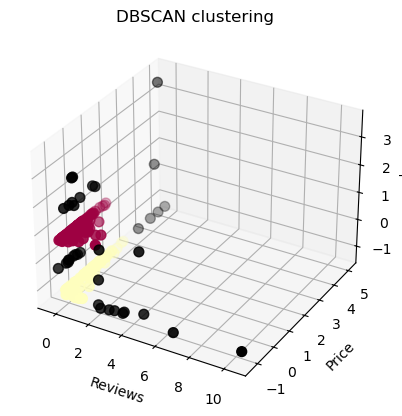

~~~~~~~~~~~~~~ CORRESPONDING OUTLIERS ~~~~~~~~~~~~~~
NUMBER OF OUTLIERS :  36
                                            Book_title    Reviews     Price  \
0                                The Elements of Style   6.611187 -1.268555   
1        The Information: A History, a Theory, a Flood   2.214547 -1.221524   
2         Responsive Web Design Overview For Beginners  -0.336702 -1.214015   
3    Ghost in the Wires: My Adventures as the World...   2.671812 -1.168964   
4                                     How Google Works   2.067569 -1.160795   
6    Start with Why: How Great Leaders Inspire Ever...  10.438061 -1.130843   
7    Algorithms to Live By: The Computer Science of...   2.960325 -1.127130   
8    Weapons of Math Destruction: How Big Data Incr...   3.461139 -1.123252   
13       Superintelligence: Paths, Dangers, Strategies   1.940551 -1.090165   
19   The Innovators: How a Group of Hackers, Genius...   3.459324 -1.046764   
23   The Code Book: The Science of Secrecy from Anc..

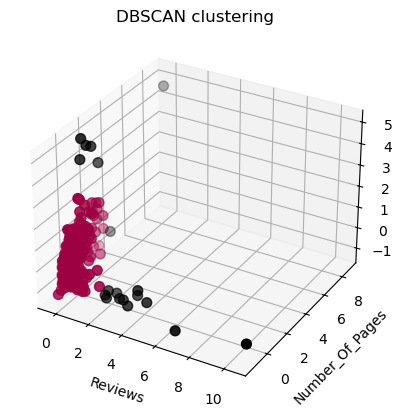

~~~~~~~~~~~~~~ CORRESPONDING OUTLIERS ~~~~~~~~~~~~~~
NUMBER OF OUTLIERS :  19
                                            Book_title    Reviews  \
0                                The Elements of Style   6.611187   
1        The Information: A History, a Theory, a Flood   2.214547   
3    Ghost in the Wires: My Adventures as the World...   2.671812   
4                                     How Google Works   2.067569   
6    Start with Why: How Great Leaders Inspire Ever...  10.438061   
7    Algorithms to Live By: The Computer Science of...   2.960325   
8    Weapons of Math Destruction: How Big Data Incr...   3.461139   
13       Superintelligence: Paths, Dangers, Strategies   1.940551   
19   The Innovators: How a Group of Hackers, Genius...   3.459324   
23   The Code Book: The Science of Secrecy from Anc...   1.964140   
45   The Phoenix Project: A Novel About IT, DevOps,...   4.433735   
90          The Goal: A Process of Ongoing Improvement   3.818604   
137  The Linux Programmin

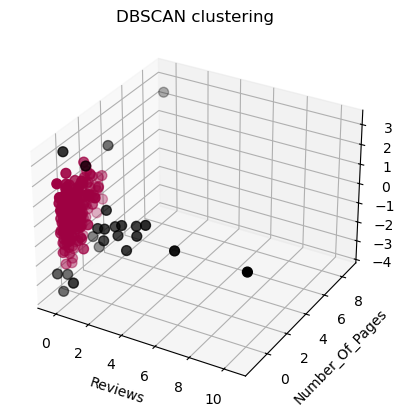

~~~~~~~~~~~~~~ CORRESPONDING OUTLIERS ~~~~~~~~~~~~~~
NUMBER OF OUTLIERS :  24
                                            Book_title    Reviews  \
0                                The Elements of Style   6.611187   
1        The Information: A History, a Theory, a Flood   2.214547   
2         Responsive Web Design Overview For Beginners  -0.336702   
3    Ghost in the Wires: My Adventures as the World...   2.671812   
4                                     How Google Works   2.067569   
6    Start with Why: How Great Leaders Inspire Ever...  10.438061   
7    Algorithms to Live By: The Computer Science of...   2.960325   
8    Weapons of Math Destruction: How Big Data Incr...   3.461139   
13       Superintelligence: Paths, Dangers, Strategies   1.940551   
19   The Innovators: How a Group of Hackers, Genius...   3.459324   
23   The Code Book: The Science of Secrecy from Anc...   1.964140   
24                       Game Programming Golden Rules  -0.336702   
45   The Phoenix Project:

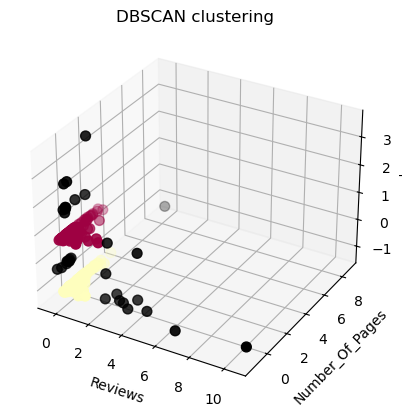

~~~~~~~~~~~~~~ CORRESPONDING OUTLIERS ~~~~~~~~~~~~~~
NUMBER OF OUTLIERS :  32
                                            Book_title    Reviews  \
0                                The Elements of Style   6.611187   
1        The Information: A History, a Theory, a Flood   2.214547   
2         Responsive Web Design Overview For Beginners  -0.336702   
3    Ghost in the Wires: My Adventures as the World...   2.671812   
4                                     How Google Works   2.067569   
6    Start with Why: How Great Leaders Inspire Ever...  10.438061   
7    Algorithms to Live By: The Computer Science of...   2.960325   
8    Weapons of Math Destruction: How Big Data Incr...   3.461139   
13       Superintelligence: Paths, Dangers, Strategies   1.940551   
19   The Innovators: How a Group of Hackers, Genius...   3.459324   
23   The Code Book: The Science of Secrecy from Anc...   1.964140   
45   The Phoenix Project: A Novel About IT, DevOps,...   4.433735   
48   A Smarter Way to Lea

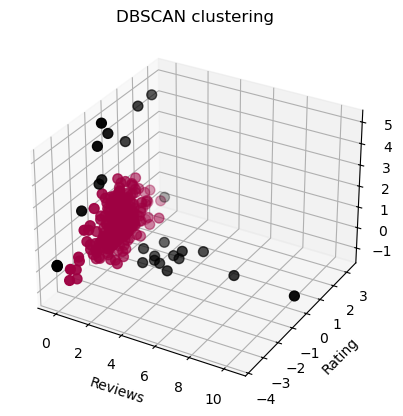

~~~~~~~~~~~~~~ CORRESPONDING OUTLIERS ~~~~~~~~~~~~~~
NUMBER OF OUTLIERS :  26
                                            Book_title    Reviews    Rating  \
0                                The Elements of Style   6.611187  0.353476   
1        The Information: A History, a Theory, a Flood   2.214547 -0.197845   
3    Ghost in the Wires: My Adventures as the World...   2.671812 -0.335676   
4                                     How Google Works   2.067569 -0.025557   
6    Start with Why: How Great Leaders Inspire Ever...  10.438061  0.077816   
7    Algorithms to Live By: The Computer Science of...   2.960325  0.284561   
8    Weapons of Math Destruction: How Big Data Incr...   3.461139 -0.680252   
13       Superintelligence: Paths, Dangers, Strategies   1.940551 -0.680252   
19   The Innovators: How a Group of Hackers, Genius...   3.459324  0.112273   
23   The Code Book: The Science of Secrecy from Anc...   1.964140  0.732510   
45   The Phoenix Project: A Novel About IT, DevOps,..

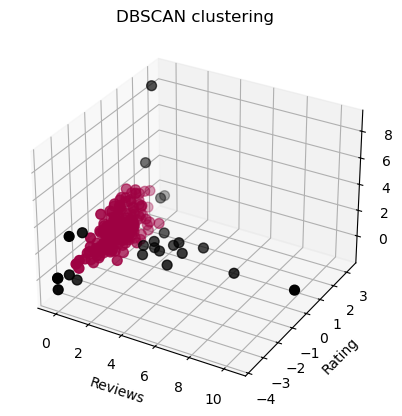

~~~~~~~~~~~~~~ CORRESPONDING OUTLIERS ~~~~~~~~~~~~~~
NUMBER OF OUTLIERS :  24
                                            Book_title    Reviews    Rating  \
0                                The Elements of Style   6.611187  0.353476   
1        The Information: A History, a Theory, a Flood   2.214547 -0.197845   
2         Responsive Web Design Overview For Beginners  -0.336702 -2.540962   
3    Ghost in the Wires: My Adventures as the World...   2.671812 -0.335676   
4                                     How Google Works   2.067569 -0.025557   
6    Start with Why: How Great Leaders Inspire Ever...  10.438061  0.077816   
7    Algorithms to Live By: The Computer Science of...   2.960325  0.284561   
8    Weapons of Math Destruction: How Big Data Incr...   3.461139 -0.680252   
13       Superintelligence: Paths, Dangers, Strategies   1.940551 -0.680252   
19   The Innovators: How a Group of Hackers, Genius...   3.459324  0.112273   
23   The Code Book: The Science of Secrecy from Anc..

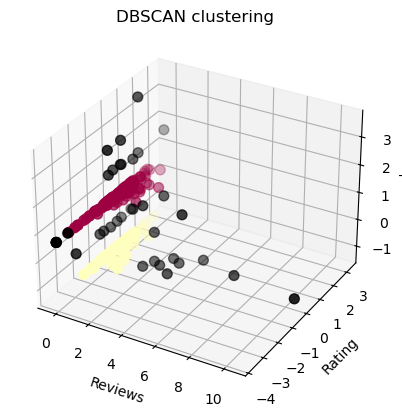

~~~~~~~~~~~~~~ CORRESPONDING OUTLIERS ~~~~~~~~~~~~~~
NUMBER OF OUTLIERS :  36
                                            Book_title    Reviews    Rating  \
0                                The Elements of Style   6.611187  0.353476   
1        The Information: A History, a Theory, a Flood   2.214547 -0.197845   
2         Responsive Web Design Overview For Beginners  -0.336702 -2.540962   
3    Ghost in the Wires: My Adventures as the World...   2.671812 -0.335676   
4                                     How Google Works   2.067569 -0.025557   
6    Start with Why: How Great Leaders Inspire Ever...  10.438061  0.077816   
7    Algorithms to Live By: The Computer Science of...   2.960325  0.284561   
8    Weapons of Math Destruction: How Big Data Incr...   3.461139 -0.680252   
13       Superintelligence: Paths, Dangers, Strategies   1.940551 -0.680252   
19   The Innovators: How a Group of Hackers, Genius...   3.459324  0.112273   
23   The Code Book: The Science of Secrecy from Anc..

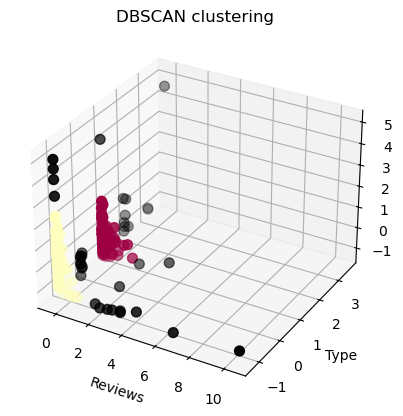

~~~~~~~~~~~~~~ CORRESPONDING OUTLIERS ~~~~~~~~~~~~~~
NUMBER OF OUTLIERS :  36
                                            Book_title    Reviews      Type  \
0                                The Elements of Style   6.611187 -1.277982   
1        The Information: A History, a Theory, a Flood   2.214547 -1.277982   
2         Responsive Web Design Overview For Beginners  -0.336702 -0.305136   
3    Ghost in the Wires: My Adventures as the World...   2.671812 -1.277982   
4                                     How Google Works   2.067569 -0.305136   
6    Start with Why: How Great Leaders Inspire Ever...  10.438061 -1.277982   
7    Algorithms to Live By: The Computer Science of...   2.960325 -1.277982   
8    Weapons of Math Destruction: How Big Data Incr...   3.461139 -1.277982   
13       Superintelligence: Paths, Dangers, Strategies   1.940551 -1.277982   
19   The Innovators: How a Group of Hackers, Genius...   3.459324 -1.277982   
23   The Code Book: The Science of Secrecy from Anc..

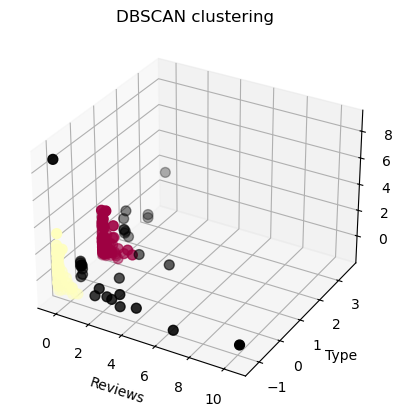

~~~~~~~~~~~~~~ CORRESPONDING OUTLIERS ~~~~~~~~~~~~~~
NUMBER OF OUTLIERS :  32
                                            Book_title    Reviews      Type  \
0                                The Elements of Style   6.611187 -1.277982   
1        The Information: A History, a Theory, a Flood   2.214547 -1.277982   
2         Responsive Web Design Overview For Beginners  -0.336702 -0.305136   
3    Ghost in the Wires: My Adventures as the World...   2.671812 -1.277982   
4                                     How Google Works   2.067569 -0.305136   
6    Start with Why: How Great Leaders Inspire Ever...  10.438061 -1.277982   
7    Algorithms to Live By: The Computer Science of...   2.960325 -1.277982   
8    Weapons of Math Destruction: How Big Data Incr...   3.461139 -1.277982   
13       Superintelligence: Paths, Dangers, Strategies   1.940551 -1.277982   
19   The Innovators: How a Group of Hackers, Genius...   3.459324 -1.277982   
23   The Code Book: The Science of Secrecy from Anc..

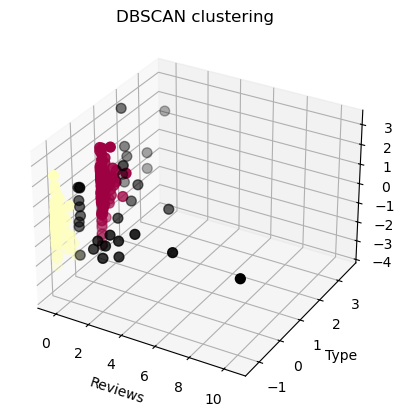

~~~~~~~~~~~~~~ CORRESPONDING OUTLIERS ~~~~~~~~~~~~~~
NUMBER OF OUTLIERS :  36
                                            Book_title    Reviews      Type  \
0                                The Elements of Style   6.611187 -1.277982   
1        The Information: A History, a Theory, a Flood   2.214547 -1.277982   
2         Responsive Web Design Overview For Beginners  -0.336702 -0.305136   
3    Ghost in the Wires: My Adventures as the World...   2.671812 -1.277982   
4                                     How Google Works   2.067569 -0.305136   
6    Start with Why: How Great Leaders Inspire Ever...  10.438061 -1.277982   
7    Algorithms to Live By: The Computer Science of...   2.960325 -1.277982   
8    Weapons of Math Destruction: How Big Data Incr...   3.461139 -1.277982   
13       Superintelligence: Paths, Dangers, Strategies   1.940551 -1.277982   
19   The Innovators: How a Group of Hackers, Genius...   3.459324 -1.277982   
23   The Code Book: The Science of Secrecy from Anc..

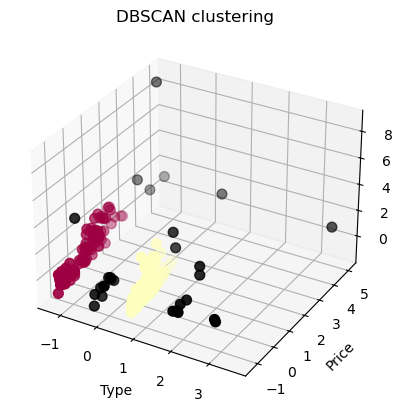

~~~~~~~~~~~~~~ CORRESPONDING OUTLIERS ~~~~~~~~~~~~~~
NUMBER OF OUTLIERS :  28
                                            Book_title      Type     Price  \
2         Responsive Web Design Overview For Beginners -0.305136 -1.214015   
4                                     How Google Works -0.305136 -1.160795   
48   A Smarter Way to Learn JavaScript: The new app... -0.305136 -0.833471   
54                             Your First App: Node.js  1.640556 -0.804757   
58        The Principles of Object-Oriented JavaScript -0.305136 -0.765811   
71   Learn Java the Easy Way : A Hands-On Introduct... -0.305136 -0.646912   
72   Make Your Own Neural Network: An In-depth Visu... -0.305136 -0.639485   
78                                 Algorithms Unlocked  1.640556 -0.566298   
85   How to Think Like a Computer Scientist: Learni...  2.613401 -0.516625   
88                 Learn You a Haskell for Great Good!  1.640556 -0.500536   
95                           Learn Python The Hard Way  2.613401

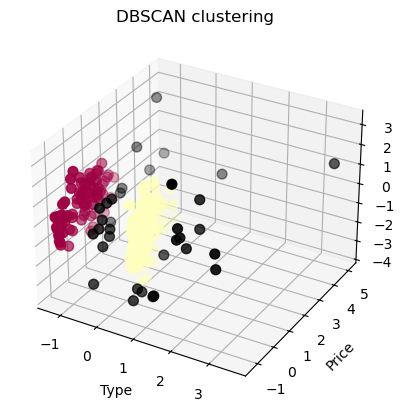

~~~~~~~~~~~~~~ CORRESPONDING OUTLIERS ~~~~~~~~~~~~~~
NUMBER OF OUTLIERS :  35
                                            Book_title      Type     Price  \
2         Responsive Web Design Overview For Beginners -0.305136 -1.214015   
4                                     How Google Works -0.305136 -1.160795   
24                       Game Programming Golden Rules  0.667710 -0.992801   
48   A Smarter Way to Learn JavaScript: The new app... -0.305136 -0.833471   
54                             Your First App: Node.js  1.640556 -0.804757   
58        The Principles of Object-Oriented JavaScript -0.305136 -0.765811   
60          Sams Teach Yourself JavaScript in 24 Hours  0.667710 -0.748814   
71   Learn Java the Easy Way : A Hands-On Introduct... -0.305136 -0.646912   
72   Make Your Own Neural Network: An In-depth Visu... -0.305136 -0.639485   
78                                 Algorithms Unlocked  1.640556 -0.566298   
85   How to Think Like a Computer Scientist: Learni...  2.613401

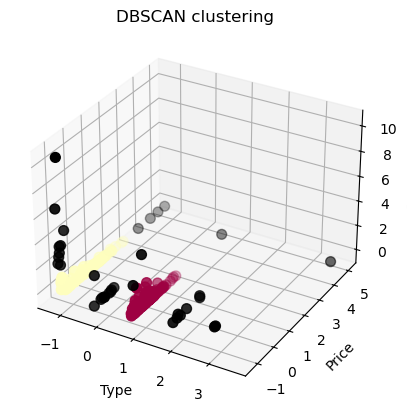

~~~~~~~~~~~~~~ CORRESPONDING OUTLIERS ~~~~~~~~~~~~~~
NUMBER OF OUTLIERS :  36
                                            Book_title      Type     Price  \
0                                The Elements of Style -1.277982 -1.268555   
1        The Information: A History, a Theory, a Flood -1.277982 -1.221524   
2         Responsive Web Design Overview For Beginners -0.305136 -1.214015   
3    Ghost in the Wires: My Adventures as the World... -1.277982 -1.168964   
4                                     How Google Works -0.305136 -1.160795   
6    Start with Why: How Great Leaders Inspire Ever... -1.277982 -1.130843   
7    Algorithms to Live By: The Computer Science of... -1.277982 -1.127130   
8    Weapons of Math Destruction: How Big Data Incr... -1.277982 -1.123252   
13       Superintelligence: Paths, Dangers, Strategies -1.277982 -1.090165   
19   The Innovators: How a Group of Hackers, Genius... -1.277982 -1.046764   
23   The Code Book: The Science of Secrecy from Anc...  0.667710

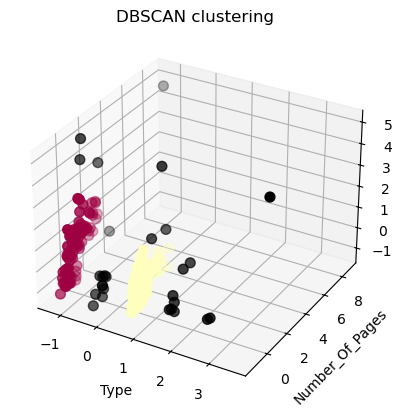

~~~~~~~~~~~~~~ CORRESPONDING OUTLIERS ~~~~~~~~~~~~~~
NUMBER OF OUTLIERS :  28
                                            Book_title      Type  \
2         Responsive Web Design Overview For Beginners -0.305136   
4                                     How Google Works -0.305136   
48   A Smarter Way to Learn JavaScript: The new app... -0.305136   
54                             Your First App: Node.js  1.640556   
58        The Principles of Object-Oriented JavaScript -0.305136   
71   Learn Java the Easy Way : A Hands-On Introduct... -0.305136   
72   Make Your Own Neural Network: An In-depth Visu... -0.305136   
78                                 Algorithms Unlocked  1.640556   
85   How to Think Like a Computer Scientist: Learni...  2.613401   
88                 Learn You a Haskell for Great Good!  1.640556   
95                           Learn Python The Hard Way  2.613401   
104  Simulation of Digital Communication Systems us... -0.305136   
107            From Mathematics to Gen

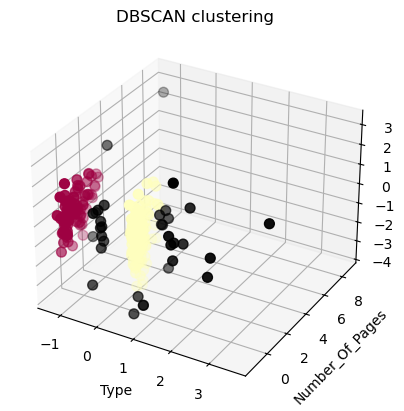

~~~~~~~~~~~~~~ CORRESPONDING OUTLIERS ~~~~~~~~~~~~~~
NUMBER OF OUTLIERS :  34
                                            Book_title      Type  \
2         Responsive Web Design Overview For Beginners -0.305136   
4                                     How Google Works -0.305136   
24                       Game Programming Golden Rules  0.667710   
48   A Smarter Way to Learn JavaScript: The new app... -0.305136   
54                             Your First App: Node.js  1.640556   
58        The Principles of Object-Oriented JavaScript -0.305136   
71   Learn Java the Easy Way : A Hands-On Introduct... -0.305136   
72   Make Your Own Neural Network: An In-depth Visu... -0.305136   
78                                 Algorithms Unlocked  1.640556   
85   How to Think Like a Computer Scientist: Learni...  2.613401   
86                                    Beginning Java 2  0.667710   
88                 Learn You a Haskell for Great Good!  1.640556   
95                           Learn Pyt

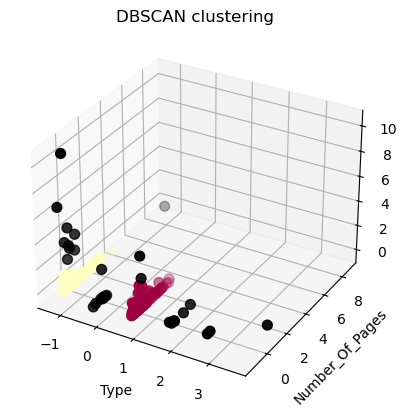

~~~~~~~~~~~~~~ CORRESPONDING OUTLIERS ~~~~~~~~~~~~~~
NUMBER OF OUTLIERS :  32
                                            Book_title      Type  \
0                                The Elements of Style -1.277982   
1        The Information: A History, a Theory, a Flood -1.277982   
2         Responsive Web Design Overview For Beginners -0.305136   
3    Ghost in the Wires: My Adventures as the World... -1.277982   
4                                     How Google Works -0.305136   
6    Start with Why: How Great Leaders Inspire Ever... -1.277982   
7    Algorithms to Live By: The Computer Science of... -1.277982   
8    Weapons of Math Destruction: How Big Data Incr... -1.277982   
13       Superintelligence: Paths, Dangers, Strategies -1.277982   
19   The Innovators: How a Group of Hackers, Genius... -1.277982   
23   The Code Book: The Science of Secrecy from Anc...  0.667710   
45   The Phoenix Project: A Novel About IT, DevOps,... -1.277982   
48   A Smarter Way to Learn JavaScript

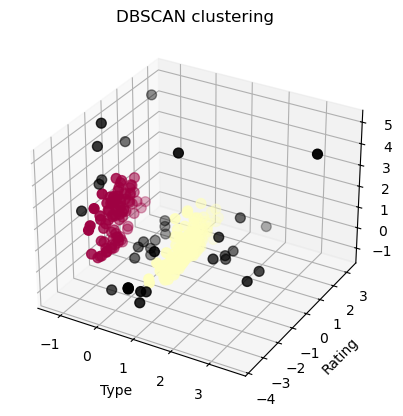

~~~~~~~~~~~~~~ CORRESPONDING OUTLIERS ~~~~~~~~~~~~~~
NUMBER OF OUTLIERS :  35
                                            Book_title      Type    Rating  \
2         Responsive Web Design Overview For Beginners -0.305136 -2.540962   
4                                     How Google Works -0.305136 -0.025557   
24                       Game Programming Golden Rules  0.667710 -2.988911   
48   A Smarter Way to Learn JavaScript: The new app... -0.305136 -0.025557   
54                             Your First App: Node.js  1.640556  3.213457   
58        The Principles of Object-Oriented JavaScript -0.305136  0.973713   
60          Sams Teach Yourself JavaScript in 24 Hours  0.667710 -2.575420   
71   Learn Java the Easy Way : A Hands-On Introduct... -0.305136 -1.059285   
72   Make Your Own Neural Network: An In-depth Visu... -0.305136  0.284561   
78                                 Algorithms Unlocked  1.640556  0.319019   
85   How to Think Like a Computer Scientist: Learni...  2.613401

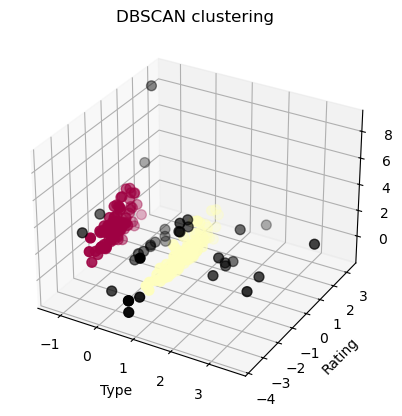

~~~~~~~~~~~~~~ CORRESPONDING OUTLIERS ~~~~~~~~~~~~~~
NUMBER OF OUTLIERS :  34
                                            Book_title      Type    Rating  \
2         Responsive Web Design Overview For Beginners -0.305136 -2.540962   
4                                     How Google Works -0.305136 -0.025557   
24                       Game Programming Golden Rules  0.667710 -2.988911   
48   A Smarter Way to Learn JavaScript: The new app... -0.305136 -0.025557   
54                             Your First App: Node.js  1.640556  3.213457   
58        The Principles of Object-Oriented JavaScript -0.305136  0.973713   
71   Learn Java the Easy Way : A Hands-On Introduct... -0.305136 -1.059285   
72   Make Your Own Neural Network: An In-depth Visu... -0.305136  0.284561   
78                                 Algorithms Unlocked  1.640556  0.319019   
85   How to Think Like a Computer Scientist: Learni...  2.613401  0.146731   
86                                    Beginning Java 2  0.667710

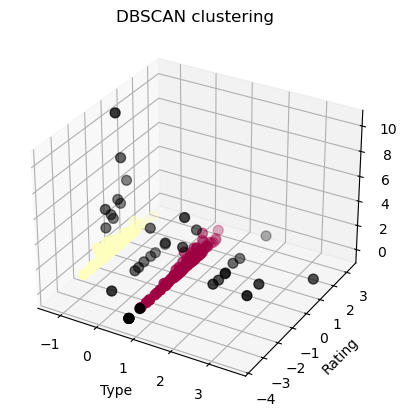

~~~~~~~~~~~~~~ CORRESPONDING OUTLIERS ~~~~~~~~~~~~~~
NUMBER OF OUTLIERS :  36
                                            Book_title      Type    Rating  \
0                                The Elements of Style -1.277982  0.353476   
1        The Information: A History, a Theory, a Flood -1.277982 -0.197845   
2         Responsive Web Design Overview For Beginners -0.305136 -2.540962   
3    Ghost in the Wires: My Adventures as the World... -1.277982 -0.335676   
4                                     How Google Works -0.305136 -0.025557   
6    Start with Why: How Great Leaders Inspire Ever... -1.277982  0.077816   
7    Algorithms to Live By: The Computer Science of... -1.277982  0.284561   
8    Weapons of Math Destruction: How Big Data Incr... -1.277982 -0.680252   
13       Superintelligence: Paths, Dangers, Strategies -1.277982 -0.680252   
19   The Innovators: How a Group of Hackers, Genius... -1.277982  0.112273   
23   The Code Book: The Science of Secrecy from Anc...  0.667710

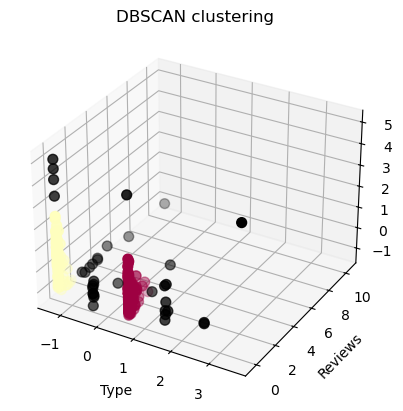

~~~~~~~~~~~~~~ CORRESPONDING OUTLIERS ~~~~~~~~~~~~~~
NUMBER OF OUTLIERS :  36
                                            Book_title      Type    Reviews  \
0                                The Elements of Style -1.277982   6.611187   
1        The Information: A History, a Theory, a Flood -1.277982   2.214547   
2         Responsive Web Design Overview For Beginners -0.305136  -0.336702   
3    Ghost in the Wires: My Adventures as the World... -1.277982   2.671812   
4                                     How Google Works -0.305136   2.067569   
6    Start with Why: How Great Leaders Inspire Ever... -1.277982  10.438061   
7    Algorithms to Live By: The Computer Science of... -1.277982   2.960325   
8    Weapons of Math Destruction: How Big Data Incr... -1.277982   3.461139   
13       Superintelligence: Paths, Dangers, Strategies -1.277982   1.940551   
19   The Innovators: How a Group of Hackers, Genius... -1.277982   3.459324   
23   The Code Book: The Science of Secrecy from Anc..

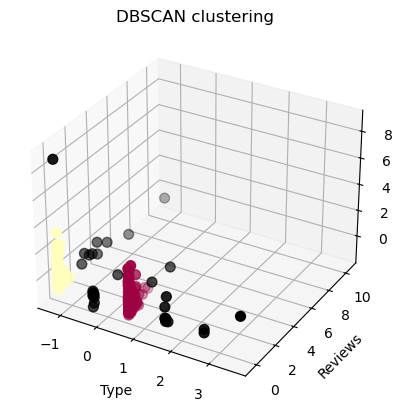

~~~~~~~~~~~~~~ CORRESPONDING OUTLIERS ~~~~~~~~~~~~~~
NUMBER OF OUTLIERS :  32
                                            Book_title      Type    Reviews  \
0                                The Elements of Style -1.277982   6.611187   
1        The Information: A History, a Theory, a Flood -1.277982   2.214547   
2         Responsive Web Design Overview For Beginners -0.305136  -0.336702   
3    Ghost in the Wires: My Adventures as the World... -1.277982   2.671812   
4                                     How Google Works -0.305136   2.067569   
6    Start with Why: How Great Leaders Inspire Ever... -1.277982  10.438061   
7    Algorithms to Live By: The Computer Science of... -1.277982   2.960325   
8    Weapons of Math Destruction: How Big Data Incr... -1.277982   3.461139   
13       Superintelligence: Paths, Dangers, Strategies -1.277982   1.940551   
19   The Innovators: How a Group of Hackers, Genius... -1.277982   3.459324   
23   The Code Book: The Science of Secrecy from Anc..

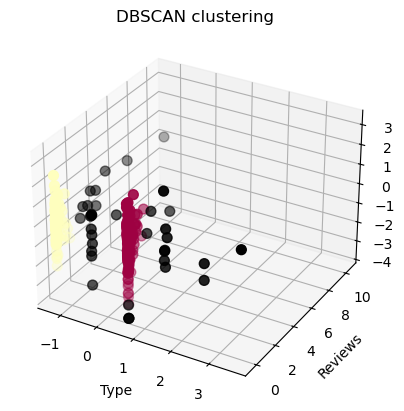

~~~~~~~~~~~~~~ CORRESPONDING OUTLIERS ~~~~~~~~~~~~~~
NUMBER OF OUTLIERS :  36
                                            Book_title      Type    Reviews  \
0                                The Elements of Style -1.277982   6.611187   
1        The Information: A History, a Theory, a Flood -1.277982   2.214547   
2         Responsive Web Design Overview For Beginners -0.305136  -0.336702   
3    Ghost in the Wires: My Adventures as the World... -1.277982   2.671812   
4                                     How Google Works -0.305136   2.067569   
6    Start with Why: How Great Leaders Inspire Ever... -1.277982  10.438061   
7    Algorithms to Live By: The Computer Science of... -1.277982   2.960325   
8    Weapons of Math Destruction: How Big Data Incr... -1.277982   3.461139   
13       Superintelligence: Paths, Dangers, Strategies -1.277982   1.940551   
19   The Innovators: How a Group of Hackers, Genius... -1.277982   3.459324   
23   The Code Book: The Science of Secrecy from Anc..

In [12]:
for coli in columns_of_interest:
    for colj in columns_of_interest:
        for colk in columns_of_interest:
            if coli == colj or colj == colk or colk == coli:
                continue

            # Apply DBSCAN
            dbscan = DBSCAN(eps=0.9, min_samples=10)
            clusters = dbscan.fit_predict(np.array(df[[coli, colj, colk]]))

            # Plotting
            fig = plt.figure()
            ax = fig.add_subplot(111, projection='3d')

            # Get unique labels
            unique_labels = set(clusters)

            # Colors for the clusters
            colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

            # Plot the points with colors
            for k, col in zip(unique_labels, colors):
                if k == -1:
                    # Black used for noise.
                    col = 'k'

                class_member_mask = (clusters == k)

                xyz = np.array(df[[coli, colj, colk]])[class_member_mask]
                ax.scatter(xyz[:, 0], xyz[:, 1], xyz[:, 2], c=[col], s=50)

            ax.set_title('DBSCAN clustering')
            ax.set_xlabel(coli)
            ax.set_ylabel(colj)
            ax.set_zlabel(colk)
            print(f"~~~~~~~~~~~~~~ PLOTTING FOR COLUMNS '{coli}', '{colj}' AND '{colk}' ~~~~~~~~~~~~~~~~~~~~~")
            plt.show()
            print("~~~~~~~~~~~~~~ CORRESPONDING OUTLIERS ~~~~~~~~~~~~~~")
            print("NUMBER OF OUTLIERS : ", len(np.where(clusters == -1)[0]))
            print(df[["Book_title", coli, colj, colk]].iloc[np.where(clusters == -1)[0]])
